###  Simulação de canais quânticos de qutrit via preparação de estados no IBMQ 

####  Douglas F. Pinto

In [15]:
import qiskit
import sympy as sym

In [16]:
qiskit.IBMQ.save_account('2537d4125e263262381a269464d18da5d1d1a37a4a00534ce31274e9e2186327f9f93c3cf4265d538d599408669cf7ebe06b299ead2876a3035550c0071af3b6', overwrite=True)

In [17]:
%run init.ipynb
from qiskit import *
nshots = 8192
IBMQ.load_account()
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
#provider = qiskit.IBMQ.get_provider(hub = 'ibm-q-research-2', group = 'federal-uni-sant-1', project = 'main')
device = provider.get_backend('ibmq_belem')
simulator = Aer.get_backend('qasm_simulator')
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

ibmqfactory.load_account:WARNING:2022-11-22 16:45:09,599: Credentials are already in use. The existing account in the session will be replaced.


In [18]:
from qiskit.tools.monitor import backend_overview, backend_monitor
backend_overview()

ibm_oslo                     ibm_nairobi                  ibmq_manila
--------                     -----------                  -----------
Num. Qubits:  7              Num. Qubits:  7              Num. Qubits:  5
Pending Jobs: 53             Pending Jobs: 13             Pending Jobs: 25
Least busy:   False          Least busy:   True           Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      151.0          Avg. T1:      113.4          Avg. T1:      173.3
Avg. T2:      98.7           Avg. T2:      83.1           Avg. T2:      51.4



ibmq_quito                   ibmq_belem                   ibmq_lima
----------                   ----------                   ---------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 63             Pending Jobs: 24             Pending Jobs: 45
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operat

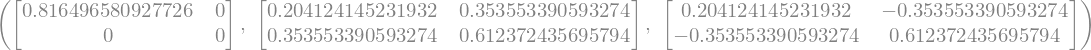

In [5]:
M1 = sqrt(2/3.)*Matrix([[1,0],[0,0]]); M2 = sqrt(2/3.)*(1/4)*Matrix([[1,sqrt(3.)],[sqrt(3.),3]])
M3 = sqrt(2/3.)*(1/4)*Matrix([[1,-sqrt(3.)],[-sqrt(3.),3]])
M1, M2, M3

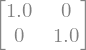

In [6]:
Dagger(M1)*M1 + Dagger(M2)*M2 + Dagger(M3)*M3

In [7]:
from qiskit import *
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.tools.monitor import job_monitor
from qiskit.tools.monitor import backend_overview, backend_monitor

<ipython-input-7-530da20c9a1f>:2: DeprecationWarning: The qiskit.ignis package is deprecated and has been supersceded by the qiskit-experiments project. Refer to the migration guide: https://github.com/Qiskit/qiskit-ignis#migration-guide on how to migrate to the new project.
  from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter


In [8]:
from qiskit import QuantumCircuit, execute
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi
import math 
%matplotlib inline

In [9]:
def pTraceR_num(dl, dr, rhoLR):
    # Returns the right partial trace over the 'right' subsystem of rhoLR
    rhoL = np.zeros((dl, dl), dtype=complex)
    for j in range(0, dl):
        for k in range(j, dl):
            for l in range(0, dr):
                rhoL[j,k] += rhoLR[j*dr+l,k*dr+l]
        if j != k:
            rhoL[k,j] = np.conj(rhoL[j,k])
    return rhoL

In [10]:
def pTraceL_num(dl, dr, rhoLR):
    # Returns the left partial trace over the 'left' subsystem of rhoLR
    rhoR = np.zeros((dr, dr), dtype=complex)
    for j in range(0, dr):
        for k in range(j, dr):
            for l in range(0, dl):
                rhoR[j,k] += rhoLR[l*dr+j,l*dr+k]
            if j != k:
                rhoR[k,j] = np.conj(rhoR[j,k])
    return rhoR

In [11]:
# Outside these functions, initialize: rhos = zeros(ds,ds), s=A,B
def ptraceA(da, db, rho):
    rhoB = zeros(db,db)
    for j in range(0, db):
        for k in range(0, db):
            for l in range(0, da):
                rhoB[j,k] += rho[l*db+j,l*db+k]
    return rhoB
def ptraceB(da, db, rho):
    rhoA = zeros(da,da)
    for j in range(0, da):
        for k in range(0, da):
            for l in range(0, db):
                rhoA[j,k] += rho[j*db+l,k*db+l]
    return rhoA

In [12]:
def coh_l1(rho):
    d = rho.shape[0]; C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += abs(rho[j,k])
    return 2*C


In [13]:
def coh_hs(rho):
    d = rho.shape[0]; C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += (abs(rho[j,k]))**2
    return 2*C

In [14]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, IBMQ
from qiskit.providers.aer import noise
from qiskit.providers.aer.noise import NoiseModel
from qiskit.visualization import plot_histogram
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter

In [ ]:
qr = QuantumRegister(5)
qubit_list = [2, 3, 4] # os qubits para os quais aplicaremos calibracao de medidas
meas_calibs, state_labels = complete_meas_cal(qubit_list = qubit_list, qr = qr)

In [ ]:
print(state_labels)

In [ ]:
meas_calibs # circuitos que serao executados para obter dados para calibracao (uma para cada state_labels)

In [ ]:
#cálculo da matriz calibração

nshots = 8192
simulator = Aer.get_backend('qasm_simulator')
job = execute(meas_calibs, backend = simulator, shots = nshots) # executa a calibracao
cal_results = job.result()

In [ ]:
# a matriz de calibracao sem ruido e a identidade
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
print(meas_fitter.cal_matrix)

In [ ]:
meas_fitter.plot_calibration()

In [ ]:
provider = IBMQ.load_account()
device = provider.get_backend('ibmq_belem')
noise_model = NoiseModel.from_backend(device)
basis_gates = noise_model.basis_gates
coupling_map = device.configuration().coupling_map

In [ ]:
#Tomografia de estado com mitigação de erros

In [ ]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

In [ ]:
#entra com o circuito

In [ ]:
provider = qiskit.IBMQ.get_provider(hub='ibm-q', group='open', project='main')
device = provider.get_backend('ibmq_belem')
from qiskit.tools.monitor import job_monitor

In [ ]:
qstc = state_tomography_circuits(qc, [qr[0], qr[1]])
job_exp = execute(qstc, backend = device, shots = nshots); job_monitor(job_exp)
qstf = StateTomographyFitter(job_exp.result(), qstc)
rho = qstf.fit(method = 'lstsq'); print(rho.real)

In [ ]:
qubit_list = [0, 1] # os qubits para os quais aplicaremos calibracao de medidas
meas_calibs, state_labels = complete_meas_cal(qubit_list = qubit_list, qr = qr)
job = execute(meas_calibs, backend = device, shots = nshots)
job_monitor(job)
cal_results = job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels)

In [ ]:
mitigated_results = meas_fitter.filter.apply(job_exp.result())
qstf = StateTomographyFitter(mitigated_results, qstc)
rho = qstf.fit(method = 'lstsq'); print(rho.real)

In [14]:
Psi_000 = (tp(cb(2,0),tp(cb(2,0),cb(2,0))) + tp(cb(2,0),tp(cb(2,1),cb(2,1))))/(2*sqrt(2)); #Psi_000
Psi_001 = (tp(cb(2,0),tp(cb(2,1),cb(2,0))) + tp(cb(2,0),tp(cb(2,0),cb(2,1))))/(2*sqrt(2)); #Psi_001
Psi_100 = (tp(cb(2,1),tp(cb(2,0),cb(2,0))) + tp(cb(2,1),tp(cb(2,1),cb(2,1))))/(2*sqrt(2)); #Psi_100
Psi_101 = (tp(cb(2,1),tp(cb(2,1),cb(2,0))) + tp(cb(2,1),tp(cb(2,0),cb(2,1))))/(2*sqrt(2)); #Psi_101

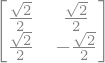

In [15]:
H = (1/sqrt(2))*Matrix([[1,1],[1,-1]]); H

### ex: estado target de fourier 

$|\psi_{0}\rangle=\frac{1}{\sqrt{3}}(|0\rangle+ \exp({2i\pi/3})|1\rangle+\exp({4i\pi/3})|2\rangle)$ ou

$|\psi_{0}\rangle=\frac{1}{\sqrt{3}}(|0\rangle+ (\frac{i\sqrt{3}-1}{2})|1\rangle-(\frac{i\sqrt{3}+1}{2})|2\rangle)$

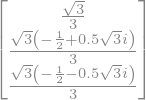

In [16]:
psi0 = (((cb(3,0)+((1j*sqrt(3)-1)/2)*cb(3,1)+((-1j*sqrt(3)-1)/2)*cb(3,2))/sqrt(3))); psi0

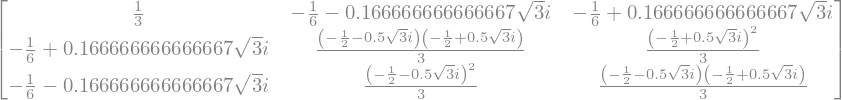

In [17]:
state_psi0 = proj(((cb(3,0)+((1j*sqrt(3)-1)/2)*cb(3,1)+((-1j*sqrt(3)-1)/2)*cb(3,2))/sqrt(3))); state_psi0

### ex: estado qutrit com amp's iguais para os subespaços $|0\rangle$ e $|2\rangle$



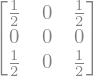

In [18]:
qutrit_mais = proj((cb(3,0)+cb(3,2))/sqrt(2)); qutrit_mais

### ex: estado de máxima coerência entre todos subespaços de  1 qutrit

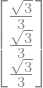

In [19]:
qu_trit_vec = ((cb(3,0)+cb(3,1)+cb(3,2))/sqrt(3)); qu_trit_vec

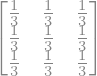

In [20]:
qu_trit = proj((cb(3,0)+cb(3,1)+cb(3,2))/sqrt(3)); qu_trit

In [21]:
from sympy import symbols

p_0, p_1, p_2 = symbols('p_0, p_1, p_2', real=True, positive=True)

In [22]:
q_0, q_1, q_2 = sym.symbols('q_0, q_1, q_2', real=True, nonnegative=True)

In [23]:
a, b = sym.symbols('a, b', real=True, positive=True)

## Canais quânticos para qudits

### Canal dephasing de Heisenberg-Weyl para qutrits

\begin{equation}
\Lambda_{d}(\rho)=\sum _{j=0}^{d-1}p_{j}Z(j)\rho Z^{\dagger}(j),
\end{equation}

com, $Z(j)=\sum_{k}^{d-1}\exp{(2\pi ijk/d)} |k\rangle \langle k|$

com operadores de Kraus, tais que: \begin{align}
\begin{cases}
K_{0}=&\sqrt{p_{0}}Z\left(0\right)=\sqrt{p_{0}}\left(|0\rangle\langle0|+|1\rangle\langle1|+|2\rangle\langle2|\right)\\ \nonumber \\ \\ 
K_{1}=&\sqrt{p_{1}}Z\left(1\right)=\sqrt{p_{1}}\left(|0\rangle\langle0|+\frac{\left(i\sqrt{3}-1\right)}{2}|1\rangle\langle1|-\frac{\left(i\sqrt{3}+1\right)}{2}|2\rangle\langle2|\right)\\ \nonumber \\
K_{2}=&\sqrt{p_{2}}Z\left(2\right)=\sqrt{p_{2}}\left(|0\rangle\langle0|-\frac{\left(i\sqrt{3}+1\right)}{2}|1\rangle\langle1|+\frac{\left(i\sqrt{3}-1\right)}{2}|2\rangle\langle2|\right)
\end{cases}
\end{align}

obtém-se

\begin{align}
\Lambda_{dhw}\left(\rho\right)=&	p_{0}Z\left(0\right)\rho Z\left(0\right)^{\dagger}+p_{1}Z\left(1\right)\rho Z\left(1\right)^{\dagger}+p_{2}Z\left(2\right)\rho Z\left(2\right)^{\dagger} \\
=&	p_{0}\rho+p_{1}\left(|0\rangle\langle0|+\frac{\left(i\sqrt{3}-1\right)}{2}|1\rangle\langle1|-\frac{\left(i\sqrt{3}+1\right)}{2}|2\rangle\langle2|\right)\rho\left(|0\rangle\langle0|+\frac{\left(i\sqrt{3}-1\right)}{2}|1\rangle\langle1|-\frac{\left(i\sqrt{3}+1\right)}{2}|2\rangle\langle2|\right) \\
	&+p_{2}\left(|0\rangle\langle0|-\frac{\left(i\sqrt{3}+1\right)}{2}|1\rangle\langle1|+\frac{\left(i\sqrt{3}-1\right)}{2}|2\rangle\langle2|\right)\rho\left(|0\rangle\langle0|+\frac{\left(i\sqrt{3}-1\right)}{2}|1\rangle\langle1|-\frac{\left(i\sqrt{3}+1\right)}{2}|2\rangle\langle2|\right)
\end{align}

### Implementação do algoritmo de preparação 

\begin{align}
|\Psi\rangle_{AB}=K_{0}|\psi_{0}\rangle_{A}\otimes|0\rangle_{B} + 
K_{1}|\psi_{0}\rangle_{A}\otimes|1\rangle_{B} +
K_{2}|\psi_{0}\rangle_{A}\otimes|2\rangle_{B}
\end{align}

consideramos o estado de fourier tal que:

\begin{align}
\psi_{0}=&\frac{1}{\sqrt{3}}(|0\rangle+e^{2\pi i/3}|1\rangle+e^{4\pi i/3}|2\rangle) \\
        &=\frac{1}{\sqrt{3}}(|0\rangle+\frac{i \sqrt{3}-1}{2}|1\rangle-\frac{i \sqrt{3}+1}{2}|2\rangle)
\end{align}

O estado global fica:


\begin{align}
|\Psi\rangle_{AB}=&\sqrt{\frac{p_{0}}{3}}|00\rangle_{aa'}\otimes|00\rangle_{bb'} +
\sqrt{\frac{p_{0}}{3}}e^{2\pi i/3}|01\rangle_{aa'}\otimes|00\rangle_{bb'} +
\sqrt{\frac{p_{0}}{3}}e^{4\pi i/3}|10\rangle_{aa'}\otimes|00\rangle_{bb'} \\ 
& + \sqrt{\frac{p_{1}}{3}}|00\rangle_{aa'}\otimes|01\rangle_{bb'} +
    \sqrt{\frac{p_{1}}{3}}e^{4\pi i/3}|01\rangle_{aa'}\otimes|01\rangle_{bb'} +
    \sqrt{\frac{p_{1}}{3}}e^{8\pi i/3}|10\rangle_{aa'}\otimes|01\rangle_{bb'} \\
& + \sqrt{\frac{p_{2}}{3}}|00\rangle_{aa'}\otimes|10\rangle_{bb'} +
    \sqrt{\frac{p_{2}}{3}}e^{6\pi i/3}|01\rangle_{aa'}\otimes|10\rangle_{bb'} +
    \sqrt{\frac{p_{2}}{3}}e^{12\pi i/3}|10\rangle_{aa'}\otimes|10\rangle_{bb'}    
\end{align}

ou seja 

\begin{align}
|\Psi\rangle_{AB}=&\sqrt{\frac{p_{0}}{3}}|00\rangle_{aa'}\otimes|00\rangle_{bb'} +
\frac{\left(i\sqrt{3}-1\right)}{2}\sqrt{\frac{p_{0}}{3}}|01\rangle_{aa'}\otimes|00\rangle_{bb'} 
-\frac{\left(i\sqrt{3}+1\right)}{2}\sqrt{\frac{p_{0}}{3}}|10\rangle_{aa'}\otimes|00\rangle_{bb'} \\ 
& + \sqrt{\frac{p_{1}}{3}}|00\rangle_{aa'}\otimes|01\rangle_{bb'} 
    -\frac{\left(i\sqrt{3}+1\right)}{2}\sqrt{\frac{p_{1}}{3}}|01\rangle_{aa'}\otimes|01\rangle_{bb'} +
    \frac{\left(i\sqrt{3}-1\right)}{2}\sqrt{\frac{p_{1}}{3}}|10\rangle_{aa'}\otimes|01\rangle_{bb'} \\
& + \sqrt{\frac{p_{2}}{3}}|00\rangle_{aa'}\otimes|10\rangle_{bb'} +
    \sqrt{\frac{p_{2}}{3}}|01\rangle_{aa'}\otimes|10\rangle_{bb'} +
    \sqrt{\frac{p_{2}}{3}}|10\rangle_{aa'}\otimes|10\rangle_{bb'}    
\end{align}

consideramos o caso onde há dependência apenas na variável  $p_{0},$ i.e, $p_{1}=p_{2}=\frac{1-p_{0}}{2}$

portanto, o estado global da preparação de estados para simulação do canal dephasing de Heisenberg-Weyl paa qutrits será:

\begin{align}
|\Psi\rangle_{AB}=&\sqrt{\frac{p_{0}}{3}}|00\rangle_{aa'}\otimes|00\rangle_{bb'} +
\frac{\left(i\sqrt{3}-1\right)}{2}\sqrt{\frac{p_{0}}{3}}|01\rangle_{aa'}\otimes|00\rangle_{bb'} 
-\frac{\left(i\sqrt{3}+1\right)}{2}\sqrt{\frac{p_{0}}{3}}|10\rangle_{aa'}\otimes|00\rangle_{bb'} \\ 
& + \sqrt{\frac{1-p_{0}}{6}}|00\rangle_{aa'}\otimes|01\rangle_{bb'} 
    -\frac{\left(i\sqrt{3}+1\right)}{2}\sqrt{\frac{1-p_{0}}{6}}|01\rangle_{aa'}\otimes|01\rangle_{bb'} +
    \frac{\left(i\sqrt{3}-1\right)}{2}\sqrt{\frac{1-p_{0}}{6}}|10\rangle_{aa'}\otimes|01\rangle_{bb'} \\
& + \sqrt{\frac{1-p_{0}}{6}}|00\rangle_{aa'}\otimes|10\rangle_{bb'} +
    \sqrt{\frac{1-p_{0}}{6}}|10\rangle_{aa'}\otimes|10\rangle_{bb'}    
    \sqrt{\frac{1-p_{0}}{6}}|01\rangle_{aa'}\otimes|10\rangle_{bb'} +
    \sqrt{\frac{1-p_{0}}{6}}|10\rangle_{aa'}\otimes|10\rangle_{bb'}    
\end{align}

### Operadores de Kraus para o canal de phase flip para qutrits

In [24]:
# Operadores de Kraus canal dephasing de HW  para qutrits___  p_1=p_2=(1-p_0)/2
def K_dHW_geral(j):
    if j == 0:
        return Matrix([[1,0,0],[0,1,0],[0,0,1]])
    elif j == 1:
        return Matrix([[1,0,0],[0,(1j*sqrt(3)-1)/2,0],[0,0,-(1j*sqrt(3)+1)/2]])
    elif j == 2:
        return Matrix([[1,0,0],[0,-(1j*sqrt(3)+1)/2,0],[0,0,(1j*sqrt(3)-1)/2]])

In [25]:
# Operadores de Kraus canal dephasing de HW  para qutrits___  p_1=p_2=(1-p_0)/2
def K_dHW(j, p):
    if j == 0:
        return sqrt(p)*Matrix([[1,0,0],[0,1,0],[0,0,1]])
    elif j == 1:
        return sqrt((1-p)/2)*Matrix([[1,0,0],[0,(1j*sqrt(3)-1)/2,0],[0,0,-(1j*sqrt(3)+1)/2]])
    elif j == 2:
        return sqrt((1-p)/2)*Matrix([[1,0,0],[0,-(1j*sqrt(3)+1)/2,0],[0,0,(1j*sqrt(3)-1)/2]])

### Ação do canal dephasing de Heisenberg-Weyl pra qutrits

In [26]:
#Ação do canal dephasing HW 
def HW_dc_geral(rho, p_0, p_1, p_2):
    return p_0*K_dHW_geral(0)*rho*Dagger(K_dHW_geral(0)) +\
           p_1*K_dHW_geral(1)*rho*Dagger(K_dHW_geral(1)) +\
           p_2*K_dHW_geral(2)*rho*Dagger(K_dHW_geral(2))

In [27]:
#Ação do canal dephasing HW 
def HW_dc(rho, q):
    return K_dHW(0, q)*rho*Dagger(K_dHW(0, q)) +\
           K_dHW(1, q)*rho*Dagger(K_dHW(1, q)) +\
           K_dHW(2, q)*rho*Dagger(K_dHW(2, q))



### Função coerência dada na aula

In [28]:
def C_Psi(rho,p_0, p_1, p_2):
    return coh_l1(rho)*sqrt(((p_0-p_1)**2 + (p_0-p_2)**2 + (p_1-p_2)**2)/2)

##### teste para estados escolhidos

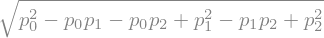

In [29]:
expand(C_Psi(qutrit_mais,p_0, p_1, p_2))

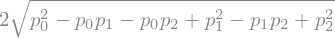

In [30]:
expand(C_Psi(qu_trit,p_0, p_1, p_2))

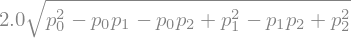

In [31]:
expand(C_Psi(state_psi0,p_0, p_1, p_2))

##### via coerência norma-l1

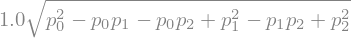

In [32]:
simplify(coh_l1(HW_dc_geral(qutrit_mais, p_0, p_1, p_2)))

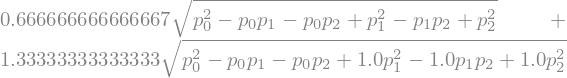

In [33]:
(simplify(coh_l1(HW_dc_geral(qu_trit, p_0, p_1, p_2))))

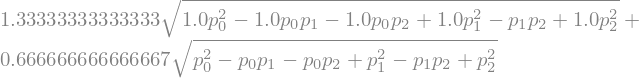

In [34]:
simplify(coh_l1(HW_dc_geral(state_psi0, p_0, p_1, p_2)))

##### via coerência de Hilbert-Schmidt

In [80]:
coh_hs((HW_dc_geral(qutrit_mais, p_0, p_1, p_2)))

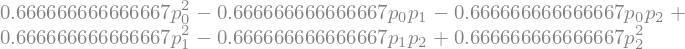

In [81]:
simplify(coh_hs((HW_dc_geral(qu_trit, p_0, p_1, p_2))))

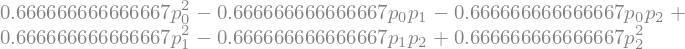

In [83]:
simplify(coh_hs((HW_dc_geral(state_psi0, p_0, p_1, p_2))))

#### restringindo para $p_{1}=p_{2}=(1-p_{0})/2$ 

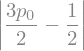

In [115]:
C_Psi(qutrit_mais,p_0, (1-p_0)/2, (1-p_0)/2)

In [116]:
simplify(C_Psi(qu_trit,p_0, (1-p_0)/2, (1-p_0)/2))

In [117]:
simplify(C_Psi(state_psi0,p_0, (1-p_0)/2, (1-p_0)/2))

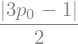

In [89]:
simplify(coh_l1(HW_dc_geral(qutrit_mais, p_0, (1-p_0)/2, (1-p_0)/2)))

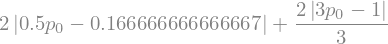

In [86]:
simplify(coh_l1(HW_dc_geral(qu_trit, p_0, (1-p_0)/2, (1-p_0)/2)))

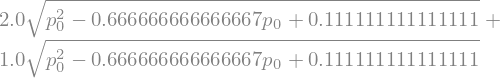

In [85]:
simplify(coh_l1(HW_dc_geral(state_psi0, p_0, (1-p_0)/2, (1-p_0)/2)))

In [151]:
simplify(coh_l1(HW_dc_geral(state_psi0, 1, (1-1)/2, (1-1)/2)))

In [155]:
simplify(coh_l1(HW_dc_geral(state_psi0, 1/3, 1/3, 1/3)))

In [152]:
simplify(coh_l1(HW_dc_geral(state_psi0, 0, (1-0)/2, (1-0)/2)))

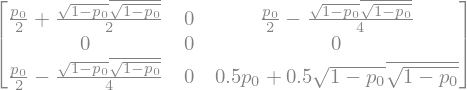

In [119]:
simplify(HW_dc(qutrit_mais , p_0))

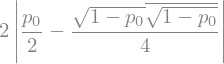

In [118]:
simplify(coh_l1((HW_dc(qutrit_mais , p_0))))

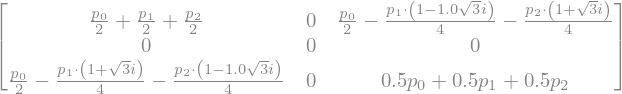

In [120]:
simplify(HW_dc_geral(qutrit_mais, p_0, p_1, p_2))

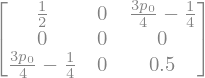

In [121]:
simplify(HW_dc_geral(qutrit_mais, p_0, (1-p_0)/2, (1-p_0)/2))

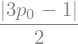

In [122]:
simplify(coh_l1(HW_dc_geral(qutrit_mais, p_0, (1-p_0)/2, (1-p_0)/2)))

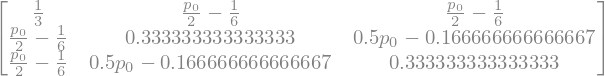

In [125]:
simplify(HW_dc_geral(qu_trit, p_0, (1-p_0)/2, (1-p_0)/2))

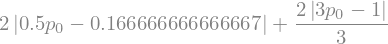

In [127]:
simplify(coh_l1(HW_dc_geral(qu_trit, p_0, (1-p_0)/2, (1-p_0)/2)))

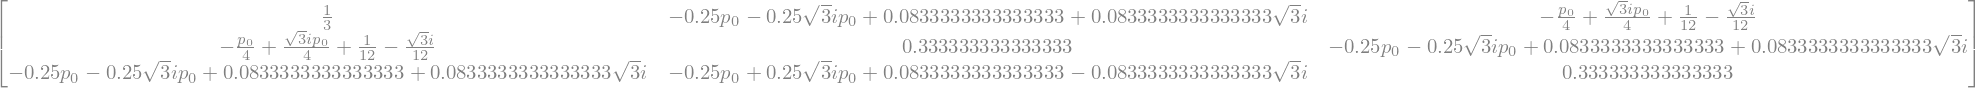

In [130]:
simplify(HW_dc_geral(PROJ_Psi_zero, p_0, (1-p_0)/2, (1-p_0)/2))

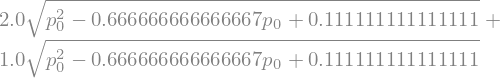

In [133]:
simplify(coh_l1((HW_dc_geral(PROJ_Psi_zero, p_0, (1-p_0)/2, (1-p_0)/2))))

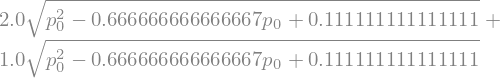

In [135]:
simplify(coh_l1((HW_dc_geral(state_psi0, p_0, (1-p_0)/2, (1-p_0)/2))))

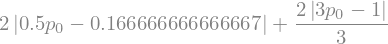

In [131]:
simplify(coh_l1(HW_dc_geral(qu_trit, p_0, (1-p_0)/2, (1-p_0)/2)))

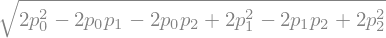

In [134]:
expand(sqrt((p_0 - p_1)**2 + (p_0 - p_2)**2 + (p_1 - p_2)**2)) 

In [43]:
import sympy as sym

x = sym.symbols('x', real=True, nonnegative=True)
t = sym.symbols('t', nonnegative=True)
x = t/(1+t)



In [44]:
>>> x < 1
True
>>> x >= 0
True

True

In [29]:
def psiXpsi(p_0,p_1,p_2): 
    return proj(sqrt((p_0)/3)*(tp(cb(4,0),cb(4,0))+((1j*sqrt(3)-1)/2)*tp(cb(4,1),cb(4,0))-((1j*sqrt(3)+1)/2)*tp(cb(4,2),cb(4,0)))+\
sqrt((p_1)/3)*(tp(cb(4,0),cb(4,1))-((1j*sqrt(3)+1)/2)*tp(cb(4,1),cb(4,1))+((1j*sqrt(3)-1)/2)*tp(cb(4,2),cb(4,1)))+\
sqrt((p_2)/3)*(tp(cb(4,0),cb(4,2))+tp(cb(4,1),cb(4,2))+tp(cb(4,2),cb(4,2))))


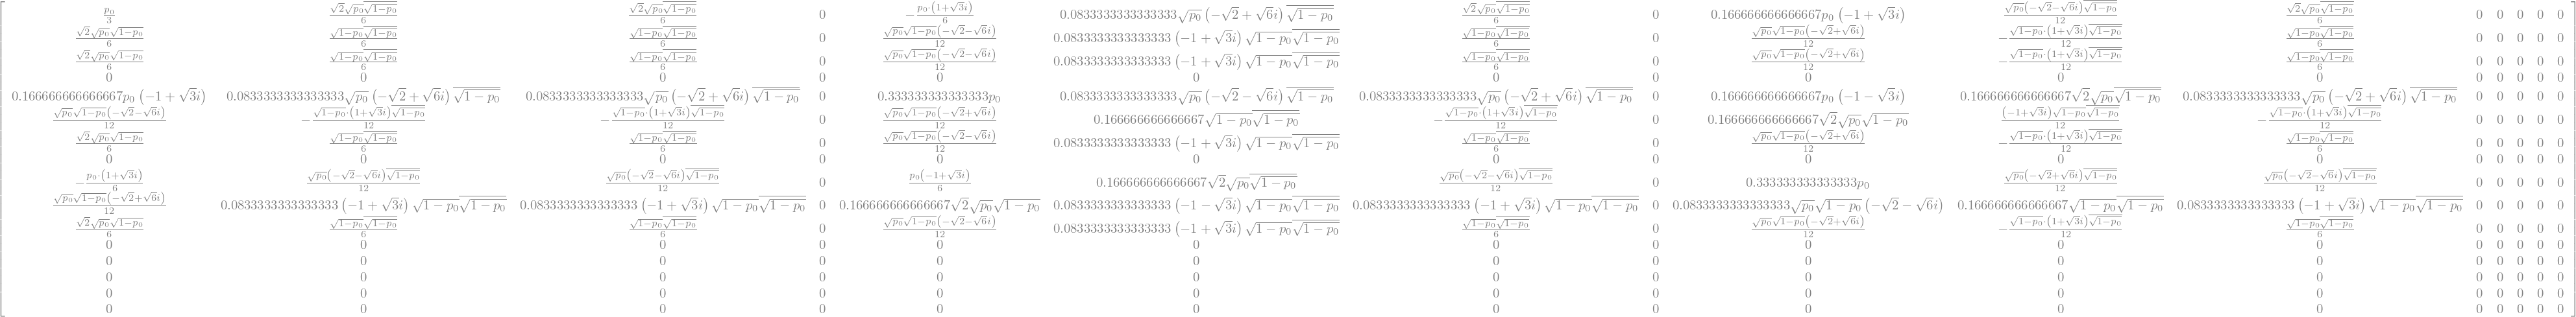

In [138]:
simplify(psiXpsi(p_0,(1-p_0)/2,(1-p_0)/2))

In [30]:
def ptB_psiXpsi(p_0,p_1,p_2):
    return ptraceB(4, 4, psiXpsi(p_0,p_1,p_2))

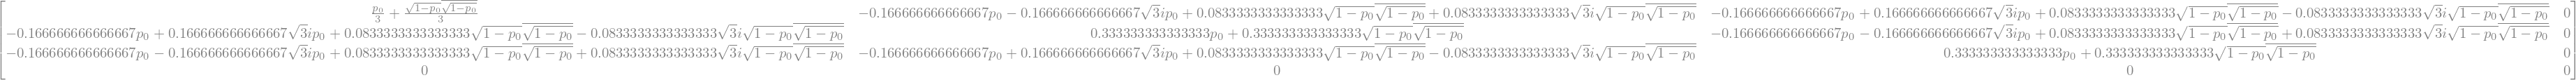

In [31]:
simplify(ptB_psiXpsi(p_0,(1-p_0)/2,(1-p_0)/2))

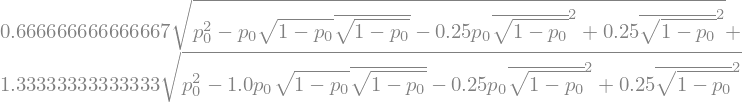

In [146]:
simplify(coh_l1((ptB_psiXpsi(p_0,(1-p_0)/2,(1-p_0)/2))))


In [147]:
simplify(coh_l1(ptB_psiXpsi(1/3,1/3,1/3)))

In [149]:
simplify(coh_l1(ptB_psiXpsi(0,1/2,1/2)))

In [150]:
simplify(coh_l1(ptB_psiXpsi(1,0,0)))

In [74]:
cb(4,0)

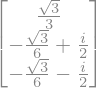

In [32]:
Psi_zero = simplify((cb(3,0)+((1j*sqrt(3)-1)/2)*cb(3,1)+((-1j*sqrt(3)-1)/2)*cb(3,2))/sqrt(3)); Psi_zero

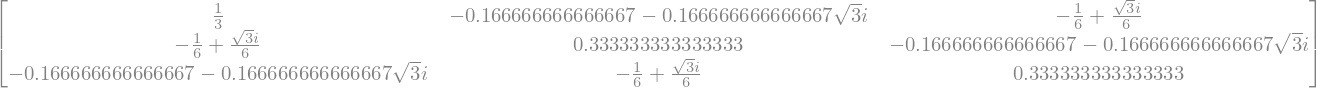

In [33]:
PROJ_Psi_zero = simplify(tp(((cb(3,0)+((1j*sqrt(3)-1)/2)*cb(3,1)+((-1j*sqrt(3)-1)/2)*cb(3,2))/sqrt(3)),Dagger(((cb(3,0)+((1j*sqrt(3)-1)/2)*cb(3,1)+((-1j*sqrt(3)-1)/2)*cb(3,2))/sqrt(3))))); PROJ_Psi_zero

In [50]:
coh_l1(PROJ_Psi_zero)

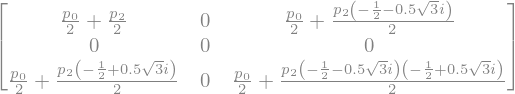

In [64]:
HW_dc_geral(qutrit_mais, p_0, 0, p_2)

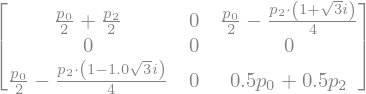

In [66]:
simplify(HW_dc_geral(qutrit_mais, p_0, 0, p_2))

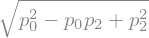

In [70]:
coh_l1((HW_dc_geral(qutrit_mais, p_0, 0, p_2)))

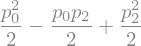

In [72]:
coh_hs((HW_dc_geral(qutrit_mais, p_0, 0, p_2)))

In [93]:
simplify(expand(coh_l1(HW_dc(PROJ_Psi_zero, q)))).evalf(3)

NameError: name 'q' is not defined

In [34]:
def PSI_num():
    return np.array([[1/3,-(1+1j*math.sqrt(3))/6,(-1+1j*math.sqrt(3))/6],[(-1+1j*math.sqrt(3))/6,1/3,-(1+1j*math.sqrt(3))/6],[-(1+1j*math.sqrt(3))/6,(-1+1j*math.sqrt(3))/6,1/3]])
PSI_num()

array([[ 0.33333333+0.j        , -0.16666667-0.28867513j,
        -0.16666667+0.28867513j],
       [-0.16666667+0.28867513j,  0.33333333+0.j        ,
        -0.16666667-0.28867513j],
       [-0.16666667-0.28867513j, -0.16666667+0.28867513j,
         0.33333333+0.j        ]])

In [35]:
def K_dHW_num(j, p):
    if j == 0:
        return math.sqrt(p)*np.array([[1,0,0],[0,1,0],[0,0,1]])
    elif j == 1:
        return math.sqrt((1-p)/2)*np.array([[1,0,0],[0,(1j*sqrt(3)-1)/2,0],[0,0,(-1j*sqrt(3)-1)/2]])
    elif j == 2:
        return math.sqrt((1-p)/2)*np.array([[1,0,0],[0,(-1j*sqrt(3)-1)/2,0],[0,0,(1j*sqrt(3)-1)/2]])

In [36]:
# Operadores de Kraus canal dephasing de HW  para qutrits___  p_1=p_2=(1-p_0)/2
def K_dHW_geral_num(j):
    if j == 0:
        return Matrix([[1,0,0],[0,1,0],[0,0,1]])
    elif j == 1:
        return Matrix([[1,0,0],[0,(1j*math.sqrt(3)-1)/2,0],[0,0,-(1j*math.sqrt(3)+1)/2]])
    elif j == 2:
        return Matrix([[1,0,0],[0,-(1j*math.sqrt(3)+1)/2,0],[0,0,(1j*math.sqrt(3)-1)/2]])
    

In [37]:
def HW_dc_num(rho, q):
    return K_dHW(0, q)*rho*(K_dHW(0, q)).T +\
           K_dHW(1, q)*rho*(K_dHW(1, q)).T +\
           K_dHW(2, q)*rho*(K_dHW(2, q)).T

In [38]:
#Ação do canal dephasing HW 
def HW_dc_geral_num(rho, p_0, p_1, p_2):
    return p_0*K_dHW_geral_num(0)*rho*(K_dHW_geral_num(0)).T +\
           p_1*K_dHW_geral_num(1)*rho*(K_dHW_geral_num(1)).T +\
           p_2*K_dHW_geral_num(2)*rho*(K_dHW_geral_num(2)).T

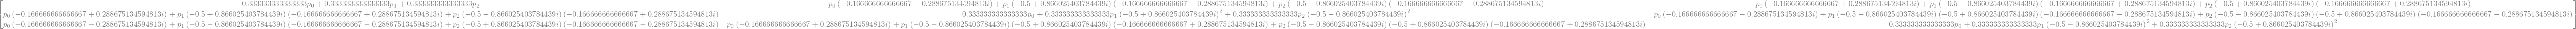

In [39]:
HW_dc_geral_num(PSI_num(), p_0, p_1, p_2)

In [40]:
def HW_dc_geral_num_(rho, p_0, p_1, p_2):
    return p_0*K_dHW_geral_num(0)*rho*np.conjugate(K_dHW_geral_num(0)).T +\
           p_1*K_dHW_geral_num(1)*rho*np.conjugate(K_dHW_geral_num(1)).T +\
           p_2*K_dHW_geral_num(2)*rho*np.conjugate(K_dHW_geral_num(2)).T


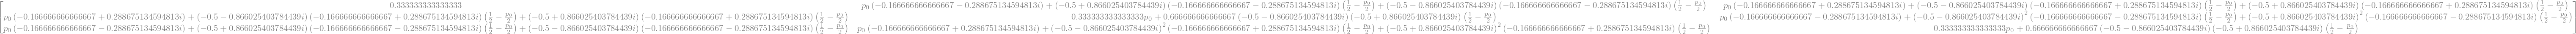

In [45]:
HW_dc_geral_num_(PSI_num(), p_0, (1-p_0)/2, (1-p_0)/2)

In [ ]:
simplify(coh_l1(HW_dc_num(PSI_num(), a)))

In [110]:
simplify(coh_l1(HW_dc_num(PSI_num(), a)))

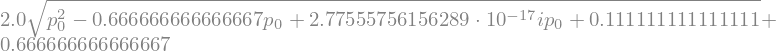

In [106]:
simplify(coh_l1(HW_dc_geral_num(PSI_num(), p_0, (1-p_0)/2, (1-p_0)/2,)))

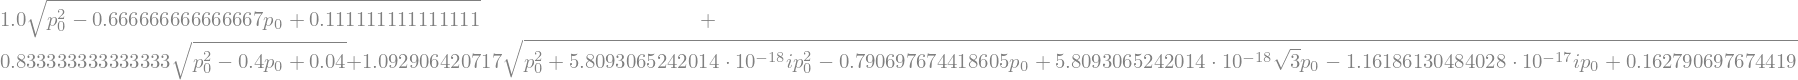

In [188]:
simplify(coh_l1(HW_dc_geral(PSI_num(), p_0, (1-p_0)/2, (1-p_0)/2,)))

In [184]:

pmax = 1; dp = pmax/11; p = np.arange(0, pmax, dp)
C = np.zeros(len(p))
for j in range(0, len(p)):
    # state preparation
    rho_HW = K_dHW(0, p[j])*PSI_num()*(K_dHW(0, p[j]).T) +\
             K_dHW(1, p[j])*PSI_num()*(K_dHW(1, p[j]).T) +\
             K_dHW(2, p[j])*PSI_num()*(K_dHW(2, p[j]).T)
    
    
    C[j] = coh_l1(rho_HW)
    ######
    
    print(C[j])

1.3333333333333335
1.1515151515151514
0.9696969696969698
0.7878787878787878
0.7272727272727272
0.9090909090909092
1.0909090909090908
1.2727272727272725
1.4545454545454546
1.6363636363636362
1.8181818181818183


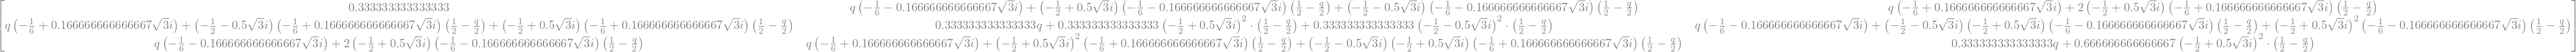

In [152]:
HW_dc(PSI_0(), q)

In [153]:
coh_l1(PSI_0())

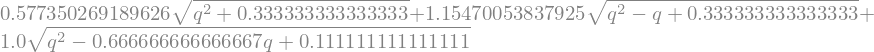

In [154]:
simplify(coh_l1(HW_dc(PSI_0(), q)))

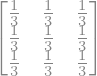

In [155]:
Matrix([[1,1,1],[1,1,1],[1,1,1]])/3

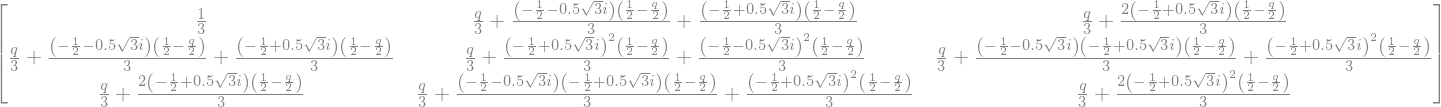

In [82]:
HW_dc(Matrix([[1,1,1],[1,1,1],[1,1,1]])/3, q)

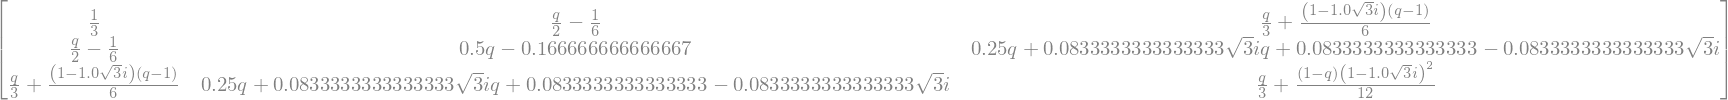

In [83]:
simplify(HW_dc(Matrix([[1,1,1],[1,1,1],[1,1,1]])/3, q))

In [41]:
def coh_l1(rho):
    d = rho.shape[0]; C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += np.abs(rho[j,k])
    return 2*C

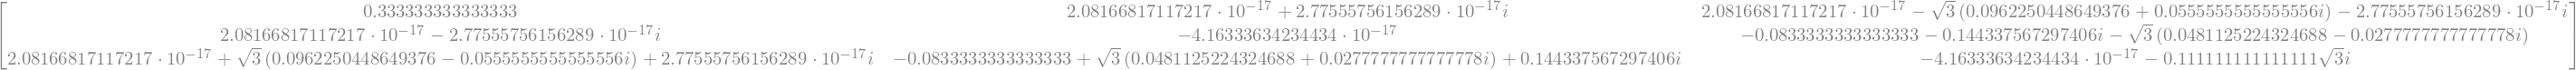

In [84]:
simplify(HW_dc(PSI_0(), 1/3))

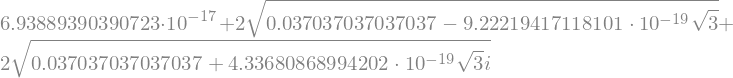

In [167]:
simplify(coh_l1(simplify(HW_dc(PSI_0(), 1/3))))

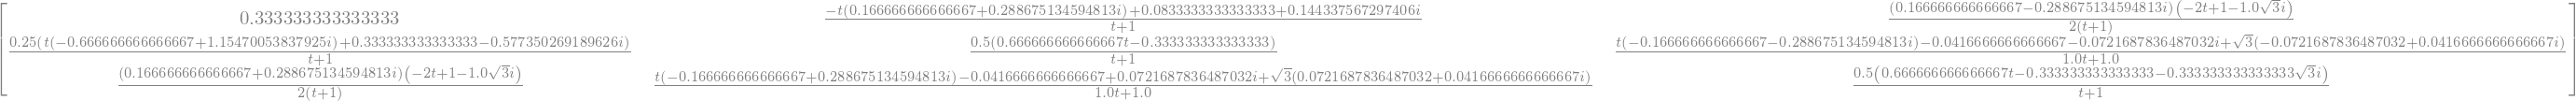

In [124]:
simplify(HW_dc(PSI_0(), x))

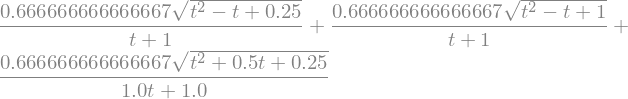

In [125]:
coh_l1(simplify(HW_dc(PSI_0(), x)))

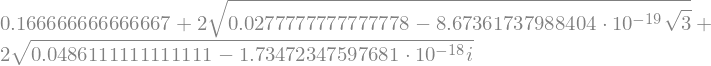

In [126]:
coh_l1(simplify(HW_dc(PSI_0(), 0.5)))

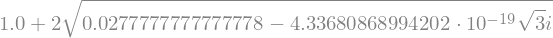

In [130]:
(coh_l1(simplify(HW_dc(PSI_0(), 0))))

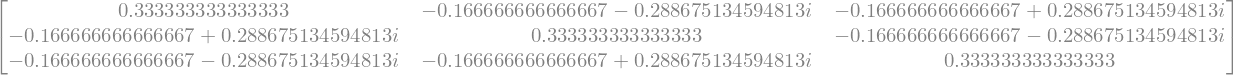

In [62]:
PSI_0()

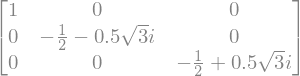

In [53]:
z_dois


In [15]:
coh_l1(simplify(proj(Psi_zero)))

In [74]:
coh_l1(PROJ_Psi_zero)

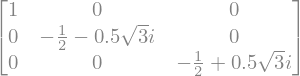

In [42]:
z_zero = proj(cb(3,0)) + proj(cb(3,1)) +proj(cb(3,2)); z_zero
z_um = proj(cb(3,0)) + ((1j*sqrt(3)-1)/2)*proj(cb(3,1)) + ((-1j*sqrt(3)-1)/2)*proj(cb(3,2)); z_um
z_dois = proj(cb(3,0)) + ((-1j*sqrt(3)-1)/2)*proj(cb(3,1)) + ((1j*sqrt(3)-1)/2)*proj(cb(3,2)); z_dois

In [43]:
 a, b = symbols('a b', real = True)

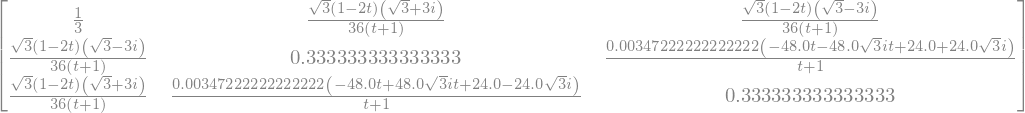

In [87]:
simplify(x*z_zero*(proj(Psi_zero))*Dagger(z_zero) +\
((1-x)/2)*z_um*(proj(Psi_zero))*Dagger(z_um) +\
((1-x)/2)*z_dois*(proj(Psi_zero))*Dagger(z_dois))

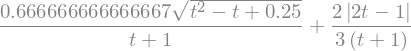

In [88]:
coh_l1(simplify(x*z_zero*(proj(Psi_zero))*Dagger(z_zero) +\
((1-x)/2)*z_um*(proj(Psi_zero))*Dagger(z_um) +\
((1-x)/2)*z_dois*(proj(Psi_zero))*Dagger(z_dois)))

In [66]:
import sympy as sym

x = sym.symbols('x', real=True, nonnegative=True)
t = sym.symbols('t', nonnegative=True)
x = t/(1+t)



In [67]:
>>> x < 1
True
>>> x >= 0
True

True

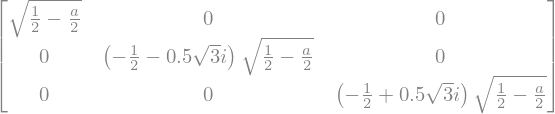

In [49]:
K_zero = sqrt(a)*z_zero; K_zero
K_um = sqrt((1-a)/2)*z_um;
K_dois = sqrt((1-a)/2)*z_dois;  K_dois

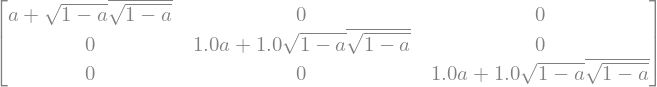

In [50]:
simplify(Dagger(K_zero)*K_zero + Dagger(K_um)*K_um + Dagger(K_dois)*K_dois) 

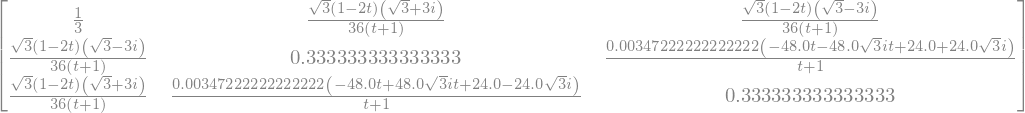

In [91]:
simplify(K_zero*(proj(Psi_zero))*Dagger(K_zero) + K_um*(proj(Psi_zero))*Dagger(K_um) + K_dois*(proj(Psi_zero))*Dagger(K_dois))

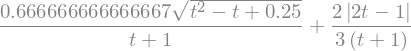

In [92]:
#em termos do parâmetro p=a

(coh_l1(simplify(K_zero*(proj(Psi_zero))*Dagger(K_zero) + K_um*(proj(Psi_zero))*Dagger(K_um) + K_dois*(proj(Psi_zero))*Dagger(K_dois))))

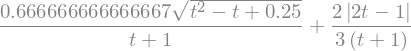

In [93]:
(coh_l1(simplify(K_zero*(proj(Psi_zero))*Dagger(K_zero) + K_um*(proj(Psi_zero))*Dagger(K_um) + K_dois*(proj(Psi_zero))*Dagger(K_dois))))

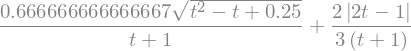

In [94]:
(coh_l1(simplify(K_zero*(proj(Psi_zero))*Dagger(K_zero) + K_um*(proj(Psi_zero))*Dagger(K_um) + K_dois*(proj(Psi_zero))*Dagger(K_dois))))

In [180]:
a=1/3

coh_l1(proj(Psi_zero))*((a-((1-a)/2))**2 + (a-((1-a)/2))**2)/2

array([0.        , 0.00826446, 0.03305785, 0.07438017, 0.1322314 ,
       0.20661157, 0.29752066, 0.40495868, 0.52892562, 0.66942149,
       0.82644628])

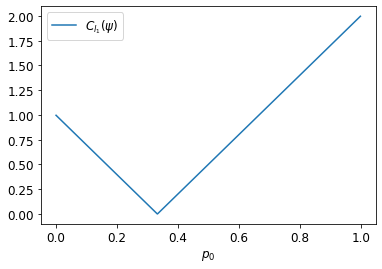

In [162]:
p = np.arange(0.001, 1.0, 0.001); Coe_psi = abs(3*p-1) ; plt.plot(p, Coe_psi, label = r'$C_{l_{1}}(\psi)$'); 
plt.legend(); plt.xlabel(r'$p_{0}$'); plt.show()

In [157]:
def C_l1_dhw_qutrit(p,q):
    return abs(3*p-1)

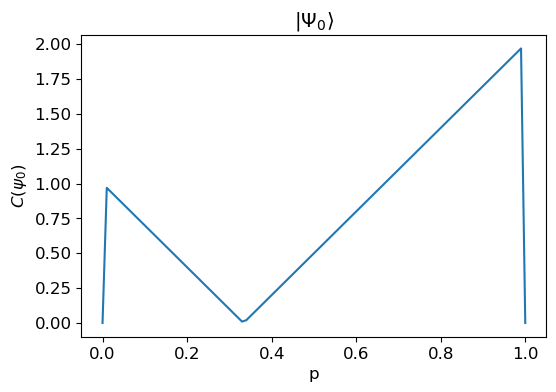

In [159]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size':12})
plt.figure(figsize = (6,4), dpi = 100)
q=0
p = np.zeros(101) 
C_Psi0 = np.zeros(101)

for j in range(0, 101):
    p[j] = j*0.01
    if p[j] != 0 and p[j] != 1:
        C_Psi0[j] = C_l1_dhw_qutrit(p[j],q);
plt.plot(p, C_Psi0)
plt.xlabel('p'); plt.ylabel(r'$C(\psi_{0})$')

plt.title(r'$|\Psi_{0}\rangle$')

plt.show()

In [161]:
def C_Psi(p, q):
    return ((p-((1-p)/2))**2 + (p-((1-p)/2))**2)

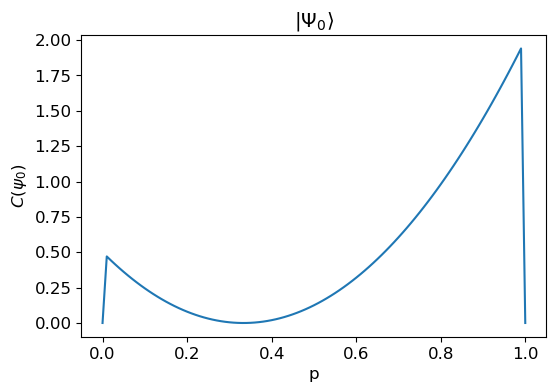

In [241]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size':12})
plt.figure(figsize = (6,4), dpi = 100)

p = np.zeros(101) 
C_Psi0 = np.zeros(101)

for j in range(0, 101):
    p[j] = j*0.01
    if p[j] != 0 and p[j] != 1:
        C_Psi0[j] = C_Psi(p[j],q);
plt.plot(p, C_Psi0)
plt.xlabel('p'); plt.ylabel(r'$C(\psi_{0})$')

plt.title(r'$|\Psi_{0}\rangle$')

plt.show()

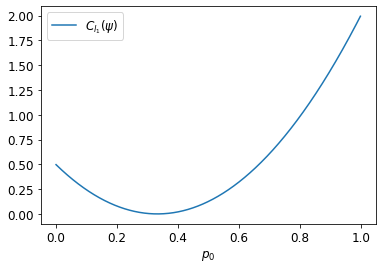

In [215]:
p = np.arange(0.001, 1.0, 0.001); Coe_psi = (p-((1-p)/2))**2 + (p-((1-p)/2))**2; plt.plot(p, Coe_psi, label = r'$C_{l_{1}}(\psi)$'); 
plt.legend(); plt.xlabel(r'$p_{0}$'); plt.show()

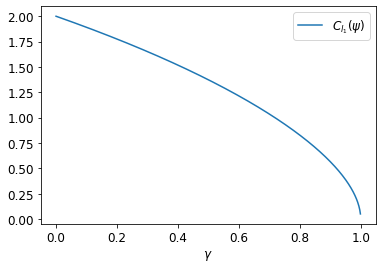

In [218]:
x = np.arange(0.001, 1.0, 0.001); 
Coe_psi_ADC = 2*(np.sqrt(1-x)+x*np.sqrt(2*(1-x))+(1-x)+np.sqrt((1-x)**3))/3 ;
plt.plot(x, Coe_psi_ADC, label = r'$C_{l_{1}}(\psi)$'); 
plt.legend(); plt.xlabel(r'$\gamma$');
plt.show()

/tmp/ipykernel_6275/3190870055.py:2: RuntimeWarning: invalid value encountered in sqrt
  Coe_psi_ADC = 2*((np.sqrt(2)*x+1)*abs(np.sqrt(1-x))+(abs((1-x)**3/2))+abs(x-1))/3 ;


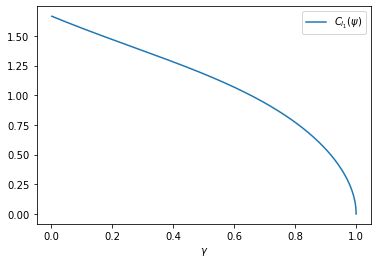

In [98]:
x = np.arange(0.001, 1.1, 0.001); 
Coe_psi_ADC = 2*((np.sqrt(2)*x+1)*abs(np.sqrt(1-x))+(abs((1-x)**3/2))+abs(x-1))/3 ;
plt.plot(x, Coe_psi_ADC, label = r'$C_{l_{1}}(\psi)$'); 
plt.legend(); plt.xlabel(r'$\gamma$');
plt.show()

/tmp/ipykernel_6275/1230124320.py:2: RuntimeWarning: invalid value encountered in sqrt
  Coe_psi_ADC = 2*(np.absolute((np.sqrt(2)*x+1)*(np.sqrt(1-x)))+np.absolute((1-x)**3/2)+np.absolute(x-1))/3 ;


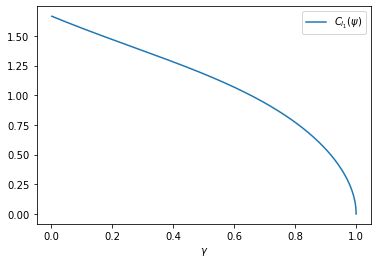

In [150]:
x = np.arange(0.001, 1.1, 0.001); 
Coe_psi_ADC = 2*(np.absolute((np.sqrt(2)*x+1)*(np.sqrt(1-x)))+np.absolute((1-x)**3/2)+np.absolute(x-1))/3 ;
plt.plot(x, Coe_psi_ADC, label = r'$C_{l_{1}}(\psi)$'); 
plt.legend(); plt.xlabel(r'$\gamma$');
plt.show()

In [ ]:
# Dephasing Heisenberg-Weyl
# Initializing a four-qubit quantum state #for target ququart state
# sequencia: 0000 0001 0010 0011 0100 0101 0110 0111 1000 1001 1010 1011 1100 1101 1110 1111 

desired_vector = [
    math.sqrt(p/3),
    1000 ,
    0100,
    0010,
    0,
    1010,
    0110,
    0,
    0001,
    1001,
    0101,
    0,
    0,
    0,
    0,
    0]

qr = QuantumRegister(4)
cr = ClassicalRegister(2);
qc = QuantumCircuit(qr,cr)

qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])

qc.measure(2,0);
qc.measure(3,1);

qc.draw(output='mpl')

In [116]:
# Dephasing Heisenberg-Weyl
# Initializing a four-qubit quantum state #for target ququart state
# sequencia: 0000 0001 0010 0011 0100 0101 0110 0111 1000 1001 1010 1011 1100 1101 1110 1111 
p0=1/2
p=1/2
desired_vector = [
    math.sqrt(p0/3),
    (math.sqrt(p0/3))*(-1j*math.sqrt(3)-1)/2,
    (math.sqrt(p0/3))*(1j*math.sqrt(3)-1)/2,
    math.sqrt(p/3),
    0,
    math.sqrt(p/3),
    math.sqrt(p/3),
    0,
    math.sqrt(p/3),
    (math.sqrt(p/3))*(1j*math.sqrt(3)-1)/2,
    (math.sqrt(p/3))*(-1j*math.sqrt(3)-1)/2,
    0,
    0,
    0,
    0,
    0]

qr = QuantumRegister(4)
cr = ClassicalRegister(2);
qc = QuantumCircuit(qr,cr)

qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])

#qc.measure(2,0);
#qc.measure(3,1);

qc.draw(output='mpl')

QiskitError: 'Sum of amplitudes-squared does not equal one.'

### Canal Amplitude Damping para qutrits

In [44]:
g = Symbol('g', real=True, positive=True)

In [45]:
#amp_damping
k0_qtrit = proj(cb(3,0)) + sqrt(1-g)*proj(cb(3,1)) + (1-g)*proj(cb(3,2))
k1_qtrit = sqrt(g)*tp(cb(3,0),Dagger(cb(3,1))) + sqrt(2*g*(1-g))*tp(cb(3,1),Dagger(cb(3,2)))
k2_qtrit = g*tp(cb(3,0),Dagger(cb(3,2)))

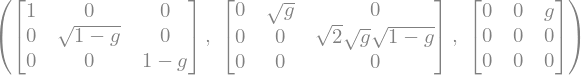

In [46]:
k0_qtrit , k1_qtrit, k2_qtrit  

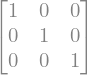

In [47]:
simplify((k0_qtrit).T*k0_qtrit + (k1_qtrit).T*k1_qtrit + (k2_qtrit).T*k2_qtrit)

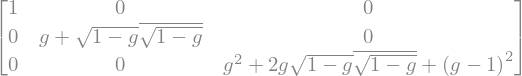

In [48]:
simplify(Dagger(k0_qtrit)*k0_qtrit + Dagger(k1_qtrit)*k1_qtrit + Dagger(k2_qtrit)*k2_qtrit)

In [49]:
def K_ADC(j, g):
    if j == 0:
        return Matrix([[1,0,0],[0,sqrt(1-g),0],[0,0,(1-g)]])
    elif j == 1:
        return Matrix([[0,sqrt(g),0],[0,0,sqrt(2*g*(1-g))],[0,0,0]])
    elif j == 2:
        return Matrix([[0,0,g],[0,0,0],[0,0,0]])

In [50]:
a = Symbol('a', real=True)

In [51]:
def PSI_0():
    return Matrix([[1/3,-(1+1j*sqrt(3))/6,(-1+1j*sqrt(3))/6],[(-1+1j*sqrt(3))/6,1/3,-(1+1j*sqrt(3))/6],[-(1+1j*sqrt(3))/6,(-1+1j*sqrt(3))/6,1/3]])

In [52]:
def qtrit_ADC(rho, a):
    return K_ADC(0, a)*rho*(K_ADC(0, a).T) +\
           K_ADC(1, a)*rho*(K_ADC(1, a).T) +\
           K_ADC(2, a)*rho*(K_ADC(2, a).T)

In [53]:
# estado a partir da isometria
def qtrit_ADC_iso(psi, a):
    return tp(K_ADC(0, a)*psi,cb(3,0)) +\
           tp(K_ADC(1, a)*psi,cb(3,1)) +\
           tp(K_ADC(2, a)*psi,cb(3,2))

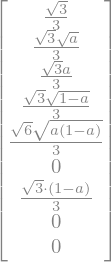

In [55]:
qtrit_ADC_iso(qu_trit_vec, a)

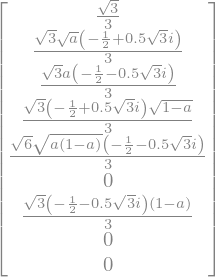

In [56]:
qtrit_ADC_iso(psi0, a)

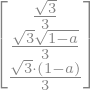

In [64]:
K_ADC(0, a)*qu_trit_vec

In [57]:
#codificação do estado inicial de qutrit para 2qubits

psi_cod_0 = (tp(cb(2,0),cb(2,0))+sqrt(1-a)*tp(cb(2,0),cb(2,1))+(1-a)*tp(cb(2,1),cb(2,0)))/sqrt(3) ; 
psi_cod_1 = (sqrt(a)*tp(cb(2,0),cb(2,0))+sqrt(2*a*(1-a))*tp(cb(2,0),cb(2,1)))/sqrt(3)
psi_cod_2 = (a*tp(cb(2,0),cb(2,0)))/sqrt(3)

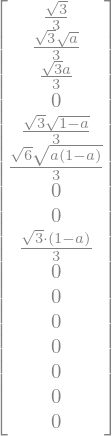

In [69]:
tp(psi_cod_0,tp(cb(2,0),cb(2,0))) + tp(psi_cod_1,tp(cb(2,0),cb(2,1))) +tp(psi_cod_2,tp(cb(2,1),cb(2,0)))

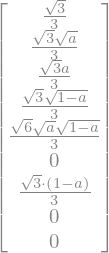

In [206]:
qtrit_ADC(qu_trit_vec, a)

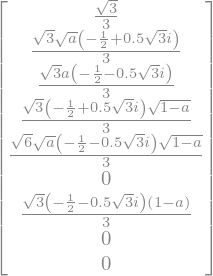

In [207]:
qtrit_ADC(psi0, a)

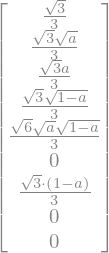

In [200]:
tp(K_ADC(0, a)*qu_trit_vec,cb(3,0)) +\
tp(K_ADC(1, a)*qu_trit_vec,cb(3,1)) +\
tp(K_ADC(2, a)*qu_trit_vec,cb(3,2))

In [125]:
simplify(coh_l1(qtrit_ADC(PSI_0(), 1)))

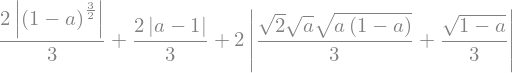

In [146]:
simplify(coh_l1(qtrit_ADC(qu_trit, a)))

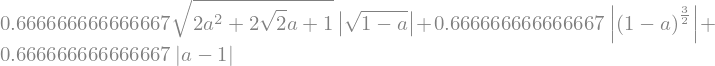

In [185]:
simplify(coh_l1(qtrit_ADC(state_psi0, a)))

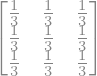

In [116]:
qu_trit

In [183]:
simplify(coh_l1(qtrit_ADC(state_psi0, 1/2)))

In [109]:
# Amplitude Damping (gamma=1/2)
# Initializing a four-qubit quantum state #for target ququart state
# sequencia: 0000 0001 0010 0011 0100 0101 0110 0111 1000 1001 1010 1011 1100 1101 1110 1111 


gmax = 1; dg = gmax/11; g = np.arange(0, gmax, dg)
C = np.zeros(len(g))
for j in range(0, len(g)):
    
    qr = qiskit.QuantumRegister(4);
    qc = qiskit.QuantumCircuit(qr);
    # state preparation
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    desired_vector =[math.sqrt(1/3),
    math.sqrt(1/3)*(1-g[j]),
    math.sqrt(1/3)*math.sqrt(1-g[j]),
    0,
    math.sqrt(1/3)*g[j],
    0,
    0,
    0,
    math.sqrt(1/3)*math.sqrt(g[j]),
    0,
    math.sqrt(1/3)*math.sqrt(2*g[j]*(1-g[j])),
    0,
    0,
    0,
    0,
    0]
    qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])
    #qstc = state_tomography_circuits(qc, [qr[0],qr[1],qr[2],qr[3]]); # circuito para TEQ
    qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
    #job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
    job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots = nshots)
    print(job.job_id()); job_monitor(job)
    qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
    rhoBA = qstf.fit(method='lstsq'); #rhoDCBA # extrai o operador densidade
    #rhoBA = pTraceL_num(4, 4, rhoDCBA); # extrai o operador densidade REDUZIDO
    #print(rhoBA[0,0])
    #rhoBA_ = qstf.fit(method='lstsq');
    C[j] = coh_l1(rhoBA)
    ######
    print(C[j])






5357d556-7f4f-4076-8b93-5914889197ac
Job Status: job has successfully run
2.002693786179322
60f45ef1-b593-4e3b-a875-29fd9b5f9f9c
Job Status: job has successfully run
1.9208126789478819
95733e06-59f1-43c4-aa21-cbdccd01c30d
Job Status: job has successfully run
1.8055172567719435
4eaa2ea6-8f03-4843-834d-6ca7753f7afd
Job Status: job has successfully run
1.7092060782763878
88f01ae9-7425-492a-9d9e-55aef015a73a
Job Status: job has successfully run
1.6041405304585958
5ab0f6b2-eeda-42e0-b1a3-a6ec2dbd210f
Job Status: job has successfully run
1.4804731199472632
c1fd69cd-de2c-4df3-b36c-343e6264244e
Job Status: job has successfully run
1.3184049945566394
9c1a9150-305f-4fa1-b7a6-df6d2228a949
Job Status: job has successfully run
1.1732130848375317
dfd57714-ae3e-4bb5-af43-e0db75fa6686
Job Status: job has successfully run
0.9888099297609687
fc59635b-de55-4855-a805-cdafa8255b77
Job Status: job has successfully run
0.8033488732834688
2d8683dc-3a6a-434e-b2ef-455609d60976
Job Status: job has successfully r

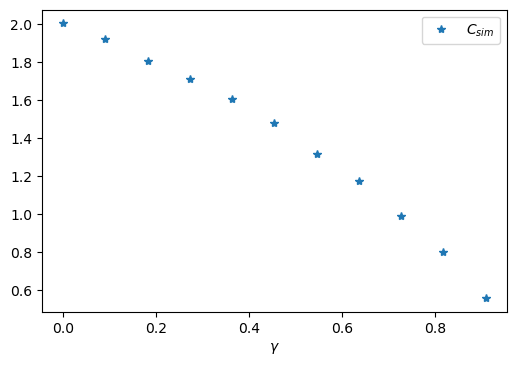

In [111]:
plt.figure(figsize = (6,4), dpi = 100)
plt.plot(g,  C, '*',label = r'$C_{sim}$')
plt.legend(); plt.xlabel(r'$\gamma$'); plt.show()

In [131]:
import sympy
from sympy import *
import numpy as np
from numpy import random
import math
import scipy
init_printing(use_unicode=True)
from matplotlib import pyplot as plt
%matplotlib inline
from sympy.physics.quantum.dagger import Dagger
from sympy.physics.quantum import TensorProduct as tp
from mpmath import factorial as fact
import io
import base64
from IPython.core.display import display, HTML, clear_output
from ipywidgets import interactive, interact, fixed, interact_manual, widgets
import csv
import importlib
import scipy.interpolate
from mpl_toolkits.mplot3d import Axes3D, proj3d
from itertools import product, combinations
from matplotlib.patches import FancyArrowPatch
from matplotlib import cm, colors
from sympy.functions.special.tensor_functions import KroneckerDelta
from scipy.linalg import polar, lapack
import mpmath

/tmp/ipykernel_6275/1833980435.py:15: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, clear_output
/tmp/ipykernel_6275/1833980435.py:15: DeprecationWarning: Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, clear_output


In [60]:

gmax = 1.0; dg = gmax/11; g = np.arange(0, gmax+dg, dg)#; g
d = g.shape[0];
C = np.zeros(d)


for j in range(0, d):

    qr = qiskit.QuantumRegister(4);
    qc = qiskit.QuantumCircuit(qr);
    # state preparation
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    desired_vector =[math.sqrt(1/3),
    math.sqrt(1/3)*(1-g[j]),
    math.sqrt(1/3)*math.sqrt(1-g[j]),
    0,
    math.sqrt(1/3)*g[j],
    0,
    0,
    0,
    math.sqrt(1/3)*math.sqrt(g[j]),
    0,
    math.sqrt(1/3)*math.sqrt(2*g[j]*(1-g[j])),
    0,
    0,
    0,
    0,
    0]
    qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])
    #qstc = state_tomography_circuits(qc, [qr[0],qr[1],qr[2],qr[3]]); # circuito para TEQ
    qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
    #job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
    #job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots = nshots)
    job = qiskit.execute(qstc, backend = device, shots = nshots)
    print(job.job_id()); job_monitor(job)
    qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
    rhoBA = qstf.fit(method='lstsq'); #rhoDCBA # extrai o operador densidade
    #rhoBA = pTraceL_num(4, 4, rhoDCBA); # extrai o operador densidade REDUZIDO
    #print(rhoBA[0,0])
    #rhoBA_ = qstf.fit(method='lstsq');
    C[j] = coh_l1(rhoBA)
    ######
    print(C[j])

635818ea2227c6726397bd8c
Job Status: job has successfully run
1.4184385958654853
63581cbbdeaa03d2750c0a93
Job Status: job has successfully run
1.367257848412157
6358201222eb4b3dbd0862af
Job Status: job has successfully run
1.197960104797166
635822a044d0bc166a3fd503
Job Status: job has successfully run
1.3766297913321612
6358266cc9de07cb57b271c7
Job Status: job has successfully run
1.1505337497942125
635828edc4d85bc29bfd96bb
Job Status: job has successfully run
1.1196175980353313
63582bd949bfe9af5ad19670
Job Status: job has successfully run
1.1166754677101822
63582f3f49bfe93411d19683
Job Status: job has successfully run
0.9349307427184111
635833652227c65c9897be0d
Job Status: job has successfully run
0.7325717022601078
6358366fc9de074797b27209
Job Status: job has successfully run
0.7279107788250189
63583d6444d0bc3a253fd58c
Job Status: job has successfully run
0.707408881374564
63584474deaa03a1480c0b52
Job Status: job has successfully run
0.2085673312823305


In [66]:

gsmax = 1.0; dgs = gsmax/11; gs = np.arange(0, gsmax+dgs, dgs)#; g
d = gs.shape[0];
Cs = np.zeros(d)


for j in range(0, d):

    qr = qiskit.QuantumRegister(4);
    qc = qiskit.QuantumCircuit(qr);
    # state preparation
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    desired_vector =[math.sqrt(1/3),
    math.sqrt(1/3)*(1-gs[j]),
    math.sqrt(1/3)*math.sqrt(1-gs[j]),
    0,
    math.sqrt(1/3)*gs[j],
    0,
    0,
    0,
    math.sqrt(1/3)*math.sqrt(gs[j]),
    0,
    math.sqrt(1/3)*math.sqrt(2*gs[j]*(1-gs[j])),
    0,
    0,
    0,
    0,
    0]
    qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])
    #qstc = state_tomography_circuits(qc, [qr[0],qr[1],qr[2],qr[3]]); # circuito para TEQ
    qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
    #job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
    job_sim = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots = nshots)
    #job = qiskit.execute(qstc, backend = device, shots = nshots)
    print(job_sim.job_id()); job_monitor(job_sim)
    qstf = StateTomographyFitter(job_sim.result(), qstc) # ajusta os dados
    rhoBA = qstf.fit(method='lstsq'); #rhoDCBA # extrai o operador densidade
    #rhoBA = pTraceL_num(4, 4, rhoDCBA); # extrai o operador densidade REDUZIDO
    #print(rhoBA[0,0])
    #rhoBA_ = qstf.fit(method='lstsq');
    Cs[j] = coh_l1(rhoBA)
    ######
    print(Cs[j])

af977d33-b84f-4e60-b38e-5c4a2a4a670e
Job Status: job has successfully run
2.000129122101883
13956600-d9c9-42bf-be36-413769c1a450
Job Status: job has successfully run
1.9219835936416385
a6a1548a-a90b-465f-82ea-f8706b3bc30b
Job Status: job has successfully run
1.8153412162118288
a77cffdc-ab5d-4457-92b4-b56deb1826f1
Job Status: job has successfully run
1.7012537324914285
bd14f5cc-522f-4052-90d5-ee2d550bba67
Job Status: job has successfully run
1.576566875371888
2a7f59fb-0860-4edb-bfdb-3e4821cefdcf
Job Status: job has successfully run
1.4582782696011651
693098fe-4f6b-4348-822a-1ae8417f22c3
Job Status: job has successfully run
1.3261886033853494
0f563dcd-4bc8-45eb-ac62-8bfa5b2c6ec6
Job Status: job has successfully run
1.16625765555781
f9a14a86-9023-4434-bfad-6e15bf9698c5
Job Status: job has successfully run
0.9798787436655128
5f0bad2a-df29-492f-bd3f-aaf014e93606
Job Status: job has successfully run
0.7696822291054879
8e5846e2-1bdb-45d1-b962-57e7ccf4761e
Job Status: job has successfully run


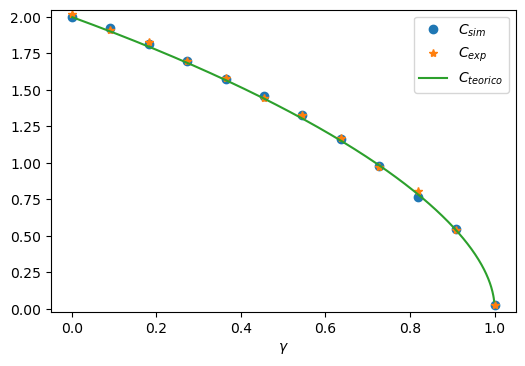

In [67]:
x = np.arange(0.001, 1.0, 0.001);
coh_teo= 2*(np.sqrt(1-x)+x*np.sqrt(2*(1-x))+(1-x)+np.sqrt((1-x)**3))/3
plt.figure(figsize = (6,4), dpi = 100)
plt.plot(gs,  Cs, 'o',label = r'$C_{sim}$')
plt.plot(g,  C, '*',label = r'$C_{exp}$')
plt.plot(x,  coh_teo,label = r'$C_{teorico}$') 

plt.legend(); plt.xlabel(r'$\gamma$'); plt.ylim(-0.02,2.05); plt.show()

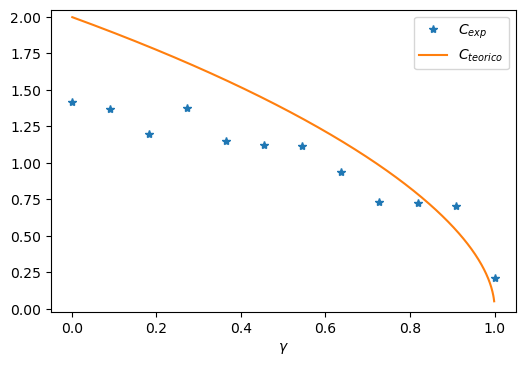

In [61]:
x = np.arange(0.001, 1.0, 0.001);
coh_teo= 2*(np.sqrt(1-x)+x*np.sqrt(2*(1-x))+(1-x)+np.sqrt((1-x)**3))/3
plt.figure(figsize = (6,4), dpi = 100)
plt.plot(g,  C, '*',label = r'$C_{exp}$')
plt.plot(x,  coh_teo,label = r'$C_{teorico}$') 

plt.legend(); plt.xlabel(r'$\gamma$'); plt.ylim(-0.02,2.05); plt.show() 

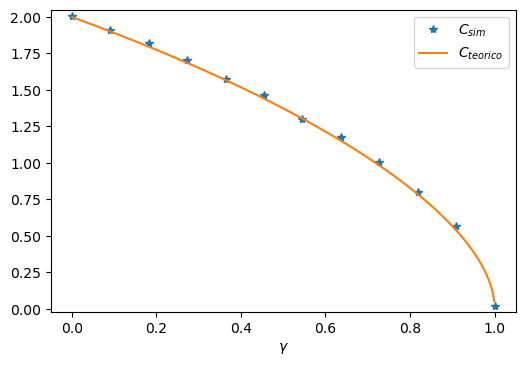

In [154]:
x = np.arange(0.001, 1.0, 0.001);
coh_teo= 2*(np.sqrt(1-x)+x*np.sqrt(2*(1-x))+(1-x)+np.sqrt((1-x)**3))/3
plt.figure(figsize = (6,4), dpi = 100)
plt.plot(g,  C, '*',label = r'$C_{sim}$')
plt.plot(x,  coh_teo,label = r'$C_{teorico}$') 

plt.legend(); plt.xlabel(r'$\gamma$'); plt.ylim(-0.02,2.05); plt.show() 

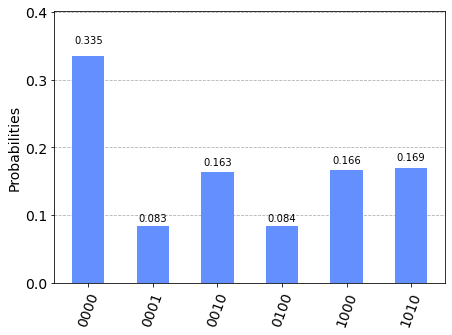

In [76]:
result = execute(qc, backend = simulator, shots = nshots).result();
plot_histogram(result.get_counts(qc))

In [ ]:
# Amplitude Damping (gamma=1/2)
# Initializing a four-qubit quantum state #for target ququart state
# sequencia: 0000 0001 0010 0011 0100 0101 0110 0111 1000 1001 1010 1011 1100 1101 1110 1111 

desired_vector = [math.sqrt(1/3),
    math.sqrt(1/3)*(1-gamma),
    math.sqrt(1/3)*math.sqrt(1-gamma),
    0,
    math.sqrt(1/3)*gamma,
    0,
    0,
    0,
    0,
    math.sqrt(1/3)*math.sqrt(gamma),
    0,
    math.sqrt(1/3)*math.sqrt(2*gamma*(1-gamma)),
    0,
    0,
    0,
    0,
    0]

qr = QuantumRegister(4)
cr = ClassicalRegister(4);
qc = QuantumCircuit(qr,cr)

qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])

qc.measure(0,0);
qc.measure(1,1);
qc.measure(2,2);
qc.measure(3,3);

qc.draw(output='mpl')

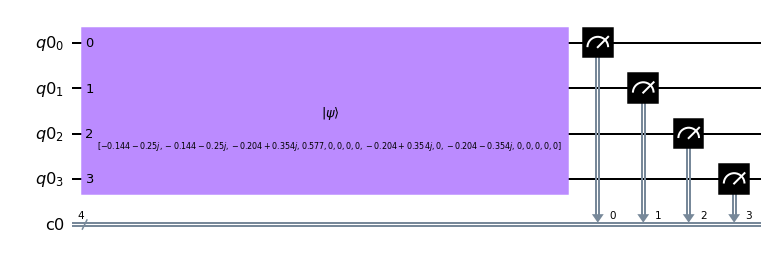

In [178]:
# Amplitude Damping (gamma=1/2)
# Initializing a four-qubit quantum state #for target ququart state
# sequencia: 0000 0001 0010 0011 0100 0101 0110 0111 1000 1001 1010 1011 1100 1101 1110 1111 

desired_vector = [
    math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/4,
    math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/4,
    math.sqrt(1/6)*(1j*math.sqrt(3)-1)/2,
    math.sqrt(1/3),
    0,
    0,
    0,
    0,
    math.sqrt(1/6)*(1j*math.sqrt(3)-1)/2,
    0,
    math.sqrt(1/6)*(-1j*math.sqrt(3)-1)/2,
    0,
    0,
    0,
    0,
    0]

qr = QuantumRegister(4)
cr = ClassicalRegister(4);
qc = QuantumCircuit(qr,cr)

qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])

qc.measure(0,0);
qc.measure(1,1);
qc.measure(2,2);
qc.measure(3,3);

qc.draw(output='mpl')

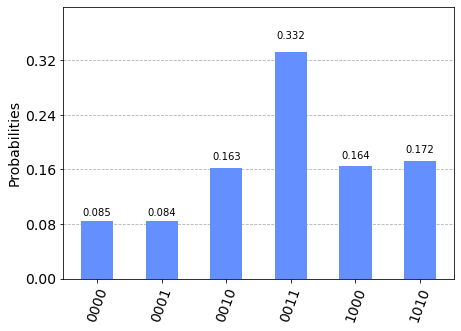

In [102]:
result = execute(qc, backend = simulator, shots = nshots).result();
plot_histogram(result.get_counts(qc))

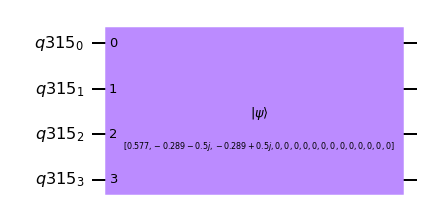

In [88]:
# Amplitude Damping (gamma=1/2)
# Initializing a four-qubit quantum state #for target ququart state
# sequencia: 0000 0001 0010 0011 0100 0101 0110 0111 1000 1001 1010 1011 1100 1101 1110 1111 

#gmax = 1.0 ; dg = gmax/10; g = np.arange(0, gmax+dg, dg); d = g.shape[0]
#gmax = 1; dg = gmax/10; g = np.arange(0, gmax+dg, dg); d = g.shape[0]
g=0.0

desired_vector = [
    math.sqrt(1/3),
    (1-g)*math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/2,
    math.sqrt((1-g)/3)*(1j*math.sqrt(3)-1)/2,
    0,
    g*math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/2,
    math.sqrt(2*g*(1-g)/3)*(-1j*math.sqrt(3)-1)/2,
    0,
    0,
    math.sqrt(g/3)*(1j*math.sqrt(3)-1)/2,
    0,
    0,
    0,
    0,
    0,
    0,
    0]

qr = QuantumRegister(4)
#cr = ClassicalRegister(4);
#qc = QuantumCircuit(qr,cr)
qc = QuantumCircuit(qr)

qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])

#qc.measure(0,0);
#qc.measure(1,1);
#qc.measure(2,2);
#qc.measure(3,3);

qc.draw(output='mpl')

In [89]:
backend = BasicAer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
qc_state = job.result().get_statevector(qc)
qc_state

array([ 0.57735027+8.32667268e-17j, -0.28867513-5.00000000e-01j,
       -0.28867513+5.00000000e-01j,  0.        +0.00000000e+00j,
        0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
        0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
        0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
        0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
        0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
        0.        +0.00000000e+00j,  0.        +0.00000000e+00j])

In [90]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
nshots = 8192
qstc = state_tomography_circuits(qc, [qr[0],qr[1],qr[2],qr[3]]); # circuito para TEQ
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
rhoDCBA = qstf.fit(method='lstsq');
#rhoDCBA # extrai o operador densidade
rhoBA = pTraceL_num(4, 4, rhoDCBA); # extrai o operador densidade REDUZIDO
rhoBA
#rhoA = pTraceL_num(2, 2, rhoBA);
#rhoA

array([[ 3.32500563e-01+0.00000000e+00j, -1.65565919e-01+2.87828002e-01j,
        -1.66378364e-01-2.87603688e-01j, -1.01544831e-04+9.08340344e-04j],
       [-1.65565919e-01-2.87828002e-01j,  3.32851990e-01+0.00000000e+00j,
        -1.66043895e-01+2.87580255e-01j,  8.28406914e-04-1.64025379e-04j],
       [-1.66378364e-01+2.87603688e-01j, -1.66043895e-01-2.87580255e-01j,
         3.33319512e-01+0.00000000e+00j, -1.05661360e-03-1.57861920e-04j],
       [-1.01544831e-04-9.08340344e-04j,  8.28406914e-04+1.64025379e-04j,
        -1.05661360e-03+1.57861920e-04j,  1.32793420e-03+0.00000000e+00j]])

In [91]:
coh_l1(rhoBA)

In [63]:
def Rho_ad(g):
    return np.kron(np.kron(cb(4,0),cb(4,0)),Dagger(np.kron(cb(4,0),cb(4,0))))/(sqrt(3)*np.conjugate(sqrt(3))) +\
np.kron(np.kron(cb(4,1),cb(4,0)),Dagger(np.kron(cb(4,1),cb(4,0))))*(((math.sqrt(1-g)*(1j*math.sqrt(3)-1))/(2*math.sqrt(3)))*np.conjugate(((math.sqrt(1-g)*(1j*math.sqrt(3)-1))/(2*math.sqrt(3))))) +\
np.kron(np.kron(cb(4,2),cb(4,0)),Dagger(np.kron(cb(4,2),cb(4,0))))*((((1-g)*(-1j*math.sqrt(3)-1))/(2*math.sqrt(3)))*np.conjugate((((1-g)*(-1j*math.sqrt(3)-1))/(2*math.sqrt(3))))) +\
np.kron(np.kron(cb(4,0),cb(4,1)),Dagger(np.kron(cb(4,0),cb(4,1))))*(((math.sqrt(g)*(1j*math.sqrt(3)-1))/(2*math.sqrt(3)))*np.conjugate(((math.sqrt(g)*(1j*math.sqrt(3)-1))/(2*math.sqrt(3))))) +\
np.kron(np.kron(cb(4,1),cb(4,1)),Dagger(np.kron(cb(4,1),cb(4,1))))*(((math.sqrt(2*g*(1-g))*(-1j*math.sqrt(3)-1))/(2*math.sqrt(3)))*np.conjugate(((math.sqrt(2*g*(1-g))*(-1j*math.sqrt(3)-1))/(2*math.sqrt(3))))) +\
np.kron(np.kron(cb(4,0),cb(4,2)),Dagger(np.kron(cb(4,0),cb(4,2))))*(((g*(-1j*math.sqrt(3)-1))/(2*math.sqrt(3)))*np.conjugate(((g*(-1j*math.sqrt(3)-1))/(2*math.sqrt(3)))))

In [67]:
coh_l1(Rho_ad(0.5))

array([[1/3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0.166666666666667, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0.0833333333333333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0.166666666666667, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0.166666666666667, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0.0833333333333333, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dty

In [68]:
g = np.arange(0, 1.05, 0.05); C = np.zeros(g.shape[0]);
for j in range(0, g.shape[0]):
    rho = Rho_ad(g[j]); C[j] = coh_l1(rho);

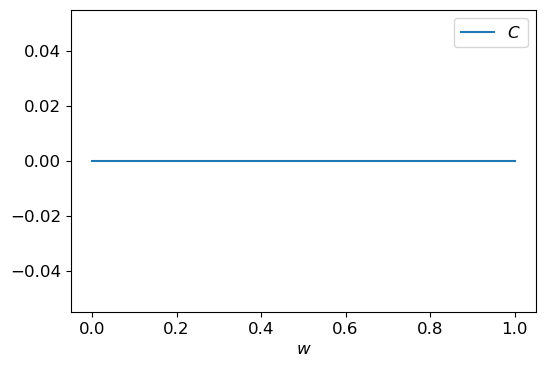

In [70]:
matplotlib.rcParams.update({'font.size':12})
plt.figure(figsize = (6,4), dpi = 100)
plt.plot(g, C, label = r'$C$');
plt.xlabel(r'$g$'); plt.legend(); plt.show()

In [80]:
def coh_l1(rho):
    d = rho.shape[0]; C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += np.abs(rho[j,k])
    return 2*C

In [81]:
rho = np.array([[1,0],[0,0]]); rho, coh_l1(rho)

(array([[1, 0],
        [0, 0]]),
 0)

In [105]:
rho = np.array([[1,1],[1,1]])/2; rho, coh_l1(rho)

(array([[0.5, 0.5],
        [0.5, 0.5]]),
 1.0)

In [106]:
rho = np.array([[1,1,1],[1,1,1],[1,1,1]])/3; coh_l1(rho)

## Preparação de estados para simulação de Canais Quânticos aplicados em Qutrits (Amplitude Damping)

In [109]:

gmax = 1; dg = gmax/101; g = np.arange(0, gmax+dg, dg)#; g
d = g.shape[0];
C = np.zeros(d)


for j in range(0, d):
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    desired_vector = [
    math.sqrt(1/3),
    (1-g[j])*math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/2,
    math.sqrt((1-g[j])/3)*(1j*math.sqrt(3)-1)/2,
    0,
    g[j]*math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/2,
    math.sqrt(2*g[j]*(1-g[j])/3)*(-1j*math.sqrt(3)-1)/2,
    0,
    0,
    math.sqrt(g[j]/3)*(1j*math.sqrt(3)-1)/2,
    0,
    0,
    0,
    0,
    0,
    0,
    0]
    qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])
    qstc = state_tomography_circuits(qc, [qr[0],qr[1],qr[2],qr[3]]); # circuito para TEQ
    #qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
    job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
    qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
    rhoDCBA = qstf.fit(method='lstsq'); #rhoDCBA # extrai o operador densidade
    rhoBA = pTraceL_num(4, 4, rhoDCBA); # extrai o operador densidade REDUZIDO
    rhoBA
    #rhoBA_ = qstf.fit(method='lstsq');
    
    C[j] = coh_l1(rhoBA)
    
    print(C[j])

1.9934962885090017
1.9749787185533803
1.9591611021867805
1.9377702862058224
1.9138128582314575
1.894890625530462
1.8780883785301572
1.8521267596729716
1.833281053249485
1.8104439871079654
1.7874263046781815
1.767769457610672
1.7440388750626048
1.7256122093854795
1.6997914459480903
1.6819483774500341
1.6672548102321991
1.642284995558147
1.6194002722759226
1.601174943183301
1.583644098574867
1.554044375874117
1.5383492868201094
1.511884037817275
1.4925511916850993
1.4751657672907996
1.461480355516213
1.4314945838330944
1.4121193963813274
1.3970146099818506
1.3672149950952819
1.3579412165448406
1.3291596740229512
1.3170739853316087
1.293311448961443
1.2776432435784024
1.2564898988079622
1.2354859114672945
1.2123995584649787
1.199088609119692
1.1777725746171583
1.1631104508960595
1.141741583822485
1.1255548599675684
1.1156212070006433
1.094116048629023
1.0726518032798933
1.0587997050057047
1.0485046901304997
1.0236247205262776
1.006947678573836
0.9964970176521153
0.9776544090418805
0.96585

In [275]:

gmax = 1; dg = gmax/101; g = np.arange(0, gmax+dg, dg)#; g
d = g.shape[0];
C = np.zeros(d)


for j in range(0, d):
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    desired_vector = [
    math.sqrt(1/3),
    (1-g[j])*math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/2,
    math.sqrt((1-g[j])/3)*(1j*math.sqrt(3)-1)/2,
    0,
    g[j]*math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/2,
    math.sqrt(2*g[j]*(1-g[j])/3)*(-1j*math.sqrt(3)-1)/2,
    0,
    0,
    math.sqrt(g[j]/3)*(1j*math.sqrt(3)-1)/2,
    0,
    0,
    0,
    0,
    0,
    0,
    0]
    qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])
    qstc = state_tomography_circuits(qc, [qr[0],qr[1],qr[2],qr[3]]); # circuito para TEQ
    #qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
    job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
    qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
    rhoDCBA = qstf.fit(method='lstsq'); #rhoDCBA # extrai o operador densidade
    rhoBA = pTraceL_num(4, 4, rhoDCBA); # extrai o operador densidade REDUZIDO
    rhoBA
    #rhoBA_ = qstf.fit(method='lstsq');
    
    C[j] = coh_l1(rhoBA)
    
    print(C[j])
   
   
    

1.9979820882484145
1.975149046626794
1.9566505742625633
1.9381899311579476
1.918255365888621
1.8957324671052245
1.877051796147939
1.8524163434993328
1.8317473515482734
1.8077542029396483
1.7850026526110914
1.7624164847046357
1.75023388010852
1.725865041311312
1.7036322045466017
1.6881348093511825
1.659968549064096
1.6409299335149603
1.6183800151108214
1.5997400497430094
1.5782894014059474
1.5579214787314624
1.5380626379687363
1.5211829144782882
1.4885659409883465
1.4694389225517284
1.461710439181859
1.4331555373149891
1.4034120767326295
1.3882047288485773
1.36935674253367
1.3481051453556792
1.3376723833913613
1.3184490203843204
1.2909793282606195
1.2699027738340665
1.255871575848279
1.236535928277899
1.213243164830223
1.2017273598817126
1.1953676279907024
1.1678654556972856
1.1436057912333288
1.1342549532491626
1.1145138189401405
1.090701975400417
1.0757902312203658
1.061051642861014
1.044043438330683
1.0249872391242407
1.0102050367935798
0.9943938060730152
0.9832382213189015
0.9733284

In [103]:
gmax = 1; dg = gmax/11; g = np.arange(0, gmax, dg)
for j in range(0, len(g)):
    qr = qiskit.QuantumRegister(5); qc = qiskit.QuantumCircuit(qr);
    # state preparation
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    desired_vector = [
    math.sqrt(1/3),
    (1-g[j])*math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/2,
    math.sqrt((1-g[j])/3)*(1j*math.sqrt(3)-1)/2,
    0,
    g[j]*math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/2,
    math.sqrt(2*g[j]*(1-g[j])/3)*(-1j*math.sqrt(3)-1)/2,
    0,
    0,
    math.sqrt(g[j]/3)*(1j*math.sqrt(3)-1)/2,
    0,
    0,
    0,
    0,
    0,
    0,
    0]
    qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])
    qstc = state_tomography_circuits(qc, [qr[0],qr[1],qr[2],qr[3]]); # circuito para TEQ
    #qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
    job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
    qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
    rhoDCBA = qstf.fit(method='lstsq'); #rhoDCBA # extrai o operador densidade
    rhoBA = pTraceL_num(4, 4, rhoDCBA); # extrai o operador densidade REDUZIDO
    #print(rhoBA[0,0])
    #rhoBA_ = qstf.fit(method='lstsq');
    C[j] = coh_l1(rhoBA)
    ######

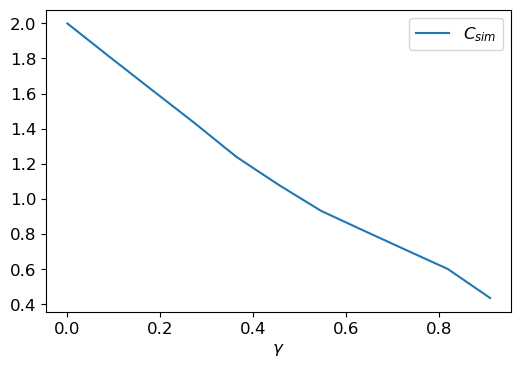

In [104]:
matplotlib.rcParams.update({'font.size':12}); 
plt.figure(figsize = (6,4), dpi = 100)
plt.plot(g,  C, label = r'$C_{sim}$')
plt.legend(); plt.xlabel(r'$\gamma$'); plt.show()

In [114]:
gmax = 1; dg = gmax/11; g = np.arange(0, gmax, dg)
for j in range(0, len(g)):
    qr = qiskit.QuantumRegister(5); qc = qiskit.QuantumCircuit(qr);
    # state preparation
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    desired_vector = [
    math.sqrt(1/3),
    (1-g[j])*math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/2,
    math.sqrt((1-g[j])/3)*(1j*math.sqrt(3)-1)/2,
    0,
    g[j]*math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/2,
    math.sqrt(2*g[j]*(1-g[j])/3)*(-1j*math.sqrt(3)-1)/2,
    0,
    0,
    math.sqrt(g[j]/3)*(1j*math.sqrt(3)-1)/2,
    0,
    0,
    0,
    0,
    0,
    0,
    0]
    qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])
    qstc = state_tomography_circuits(qc, [qr[0],qr[1],qr[2],qr[3]]); # circuito para TEQ
    #qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
    #job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
    job = qiskit.execute(qstc, backend = device, shots = nshots)
    print(job.job_id()); job_monitor(job)
    qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
    rhoDCBA = qstf.fit(method='lstsq'); #rhoDCBA # extrai o operador densidade
    rhoBA = pTraceL_num(4, 4, rhoDCBA); # extrai o operador densidade REDUZIDO
    #print(rhoBA[0,0])
    #rhoBA_ = qstf.fit(method='lstsq');
    C[j] = coh_l1(rhoBA)
    ######

632d9b5a22bb0188cde8a9ce
Job Status: job has successfully run
632d9e6f008546d7e90d4843
Job Status: job has successfully run
632da42422bb015077e8a9e8
Job Status: job has successfully run
632da7c7e150f1f37c9e122a
Job Status: job has successfully run
632dacb2511f97d6a725539e
Job Status: job has successfully run
632db09e6b619a2d860d725f
Job Status: job has successfully run
632db566fcf0f3568eead22a
Job Status: job has successfully run
632db9a0e150f1093c9e1263
Job Status: job has successfully run
632df04ee150f1445b9e1309
Job Status: job has successfully run
632df4cae150f18af29e1312
Job Status: job has successfully run
632df90405c8fd0f82900e87
Job Status: job has successfully run


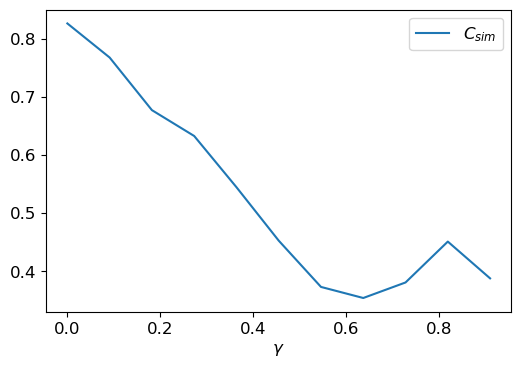

In [115]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(g,  C, label = r'$C_{sim}$')
plt.legend(); plt.xlabel(r'$\gamma$'); plt.show()

In [68]:
# Amplitude Damping (gamma=1/2)
# Initializing a four-qubit quantum state #for target ququart state
# sequencia: 0000 0001 0010 0011 0100 0101 0110 0111 1000 1001 1010 1011 1100 1101 1110 1111 

#gmax = 1.0 ; dg = gmax/10; g = np.arange(0, gmax+dg, dg); d = g.shape[0]
#gmax = 1; dg = gmax/10; g = np.arange(0, gmax+dg, dg); d = g.shape[0]
g=0.0

desired_vector = [
    math.sqrt(1/3),
    (1-g)*math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/2,
    math.sqrt((1-g)/3)*(1j*math.sqrt(3)-1)/2,
    0,
    g*math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/2,
    math.sqrt(2*g*(1-g)/3)*(-1j*math.sqrt(3)-1)/2,
    0,
    0,
    math.sqrt(g/3)*(1j*math.sqrt(3)-1)/2,
    0,
    0,
    0,
    0,
    0,
    0,
    0]

qr = QuantumRegister(4)
#cr = ClassicalRegister(4);
#qc = QuantumCircuit(qr,cr)
qc = QuantumCircuit(qr)

qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])

#qc.measure(0,0);
#qc.measure(1,1);
#qc.measure(2,2);
#qc.measure(3,3);

#qc.draw(output='mpl')
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
nshots = 8192
qstc = state_tomography_circuits(qc, [qr[0],qr[1],qr[2],qr[3]]); # circuito para TEQ
job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
rhoDCBA = qstf.fit(method='lstsq');
#rhoDCBA # extrai o operador densidade
rhoBA = pTraceL_num(4, 4, rhoDCBA); # extrai o operador densidade REDUZIDO
#rhoBA
#rhoA = pTraceL_num(2, 2, rhoBA);
#rhoA
coh_l1(rhoBA)

## Simulação do canal Dephasing Heisenberg-Weyl para qutrits

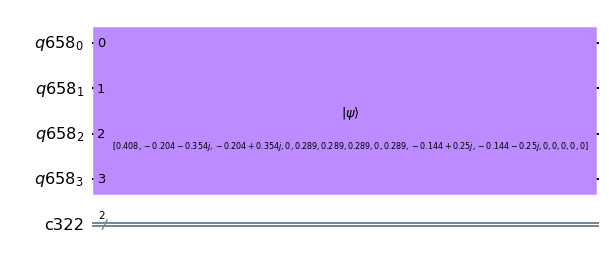

In [118]:
# Dephasing Heisenberg-Weyl
# Initializing a four-qubit quantum state #for target ququart state
# sequencia: 0000 0001 0010 0011 0100 0101 0110 0111 1000 1001 1010 1011 1100 1101 1110 1111 
p0=1/2
p=1/2
desired_vector = [
    math.sqrt(1/6),
    (math.sqrt(1/6))*(-1j*math.sqrt(3)-1)/2,
    (math.sqrt(1/6))*(1j*math.sqrt(3)-1)/2,
    0,
    math.sqrt(1/12),
    math.sqrt(1/12),
    math.sqrt(1/12),
    0,
    math.sqrt(1/12),
    (math.sqrt(1/12))*(1j*math.sqrt(3)-1)/2,
    (math.sqrt(1/12))*(-1j*math.sqrt(3)-1)/2,
    0,
    0,
    0,
    0,
    0]

qr = QuantumRegister(4)
cr = ClassicalRegister(2);
qc = QuantumCircuit(qr,cr)

qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])

#qc.measure(2,0);
#qc.measure(3,1);

qc.draw(output='mpl')

In [129]:
# Dephasing Heisenberg-Weyl
# Initializing a four-qubit quantum state #for target ququart state
# sequencia: 0000 0001 0010 0011 0100 0101 0110 0111 1000 1001 1010 1011 1100 1101 1110 1111 
#p0=p2=(1-p1)/2
#p0=p1=(1-p2)/2
desired_vector = [
    math.sqrt((1-p)/6),
    (math.sqrt((1-p)/6))*(-1j*math.sqrt(3)-1)/2,
    (math.sqrt((1-p)/6))*(1j*math.sqrt(3)-1)/2,
    0,
    math.sqrt(p/3),
    math.sqrt(p/3),
    math.sqrt(p/3),
    0,
    math.sqrt((1-p)/6),
    (math.sqrt((1-p)/6))*(1j*math.sqrt(3)-1)/2,
    (math.sqrt((1-p)/6))*(-1j*math.sqrt(3)-1)/2,
    0,
    0,
    0,
    0,
    0]

qr = QuantumRegister(4)
cr = ClassicalRegister(2);
qc = QuantumCircuit(qr,cr)

qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])

#qc.measure(2,0);
#qc.measure(3,1);

qc.draw(output='mpl')

TypeError: only size-1 arrays can be converted to Python scalars

In [117]:
pmax = 1.0; dp = pmax/101; p = np.arange(0.0, pmax, dp)

C = np.zeros(len(p))

for j in range(0, len(p)):
    qr = qiskit.QuantumRegister(5); qc = qiskit.QuantumCircuit(qr);
    # state preparation
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    desired_vector_HW = [
    math.sqrt(p[j]/3),
    (math.sqrt(p[j]/3))*(-1j*math.sqrt(3)-1)/2,
    (math.sqrt(p[j]/3))*(1j*math.sqrt(3)-1)/2,
    0,
    math.sqrt((1-p[j])/6),
    math.sqrt((1-p[j])/6),
    math.sqrt((1-p[j])/6),
    0,
    math.sqrt((1-p[j])/6),
    (math.sqrt((1-p[j])/6))*(1j*math.sqrt(3)-1)/2,
    (math.sqrt((1-p[j])/6))*(-1j*math.sqrt(3)-1)/2,
    0,
    0,
    0,
    0,
    0]
    qc.initialize(desired_vector_HW, [qr[0],qr[1],qr[2],qr[3]])
    qstc = state_tomography_circuits(qc, [qr[0],qr[1],qr[2],qr[3]]); # circuito para TEQ
    #qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
    job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
    qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
    rhoDCBA = qstf.fit(method='lstsq'); #rhoDCBA # extrai o operador densidade
    rhoBA = pTraceL_num(4, 4, rhoDCBA); # extrai o operador densidade REDUZIDO
    #print(rhoBA[0,0])
    #rhoBA_ = qstf.fit(method='lstsq');
    C[j] = coh_l1(rhoBA)
    ######

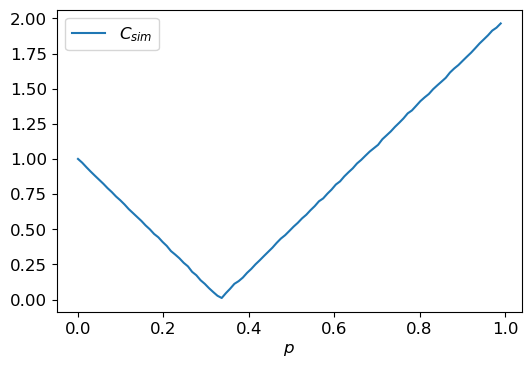

In [118]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(p,  C, label = r'$C_{sim}$')
plt.legend(); plt.xlabel(r'$p$'); plt.show()

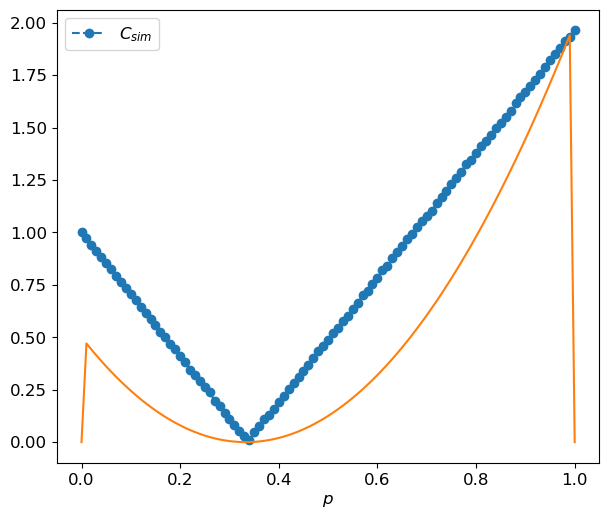

In [123]:
import matplotlib
 
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (7,6), dpi = 100)

plt.plot(p,  C, 'o--', label = r'$C_{sim}$'), plt.plot(p, C_Psi0)
plt.legend(); plt.xlabel(r'$p$'); plt.show()

In [121]:
def C_Psi(p, q):
    return ((p-((1-p)/2))**2 + (p-((1-p)/2))**2)

In [122]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size':12})
plt.figure(figsize = (6,4), dpi = 100)

p = np.zeros(101) 
C_Psi0 = np.zeros(101)

for j in range(0, 101):
    p[j] = j*0.01
    if p[j] != 0 and p[j] != 1:
        C_Psi0[j] = C_Psi(p[j],q);

<Figure size 600x400 with 0 Axes>

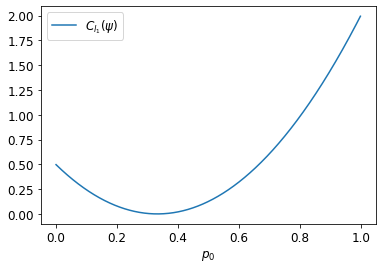

In [245]:
y = np.arange(0.001, 1.0, 0.001);
Coe_psi = (y-((1-y)/2))**2 + (y-((1-y)/2))**2;
plt.plot(y, Coe_psi, label = r'$C_{l_{1}}(\psi)$'); 
plt.legend(); plt.xlabel(r'$p_{0}$'); plt.show()

In [248]:
pmax = 1; dp = pmax/11; p = np.arange(0, pmax, dp)
C = np.zeros(len(p))

for j in range(0, len(p)):
    qr = qiskit.QuantumRegister(5); qc = qiskit.QuantumCircuit(qr);
    # state preparation
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    desired_vector_HW = [
    math.sqrt(p[j]/3),
    (math.sqrt(p[j]/3))*(-1j*math.sqrt(3)-1)/2,
    (math.sqrt(p[j]/3))*(1j*math.sqrt(3)-1)/2,
    0,
    math.sqrt((1-p[j])/6),
    math.sqrt((1-p[j])/6),
    math.sqrt((1-p[j])/6),
    0,
    math.sqrt((1-p[j])/6),
    (math.sqrt((1-p[j])/6))*(1j*math.sqrt(3)-1)/2,
    (math.sqrt((1-p[j])/6))*(-1j*math.sqrt(3)-1)/2,
    0,
    0,
    0,
    0,
    0]
    qc.initialize(desired_vector_HW, [qr[0],qr[1],qr[2],qr[3]])
    qstc = state_tomography_circuits(qc, [qr[0],qr[1],qr[2],qr[3]]); # circuito para TEQ
    #qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
    job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
    qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
    rhoDCBA = qstf.fit(method='lstsq'); #rhoDCBA # extrai o operador densidade
    rhoBA = pTraceL_num(4, 4, rhoDCBA); # extrai o operador densidade REDUZIDO
    #print(rhoBA[0,0])
    #rhoBA_ = qstf.fit(method='lstsq');
    C[j] = coh_l1(rhoBA)
    ######
    
    print(C[j])

1.0022544028843223
0.7325376613208868
0.45949907998721445
0.18825437163093628
0.09455994240703594
0.363767614822263
0.6335228624238048
0.9093824829686271
1.1817474265039907
1.458334454508412
1.7312057620245234


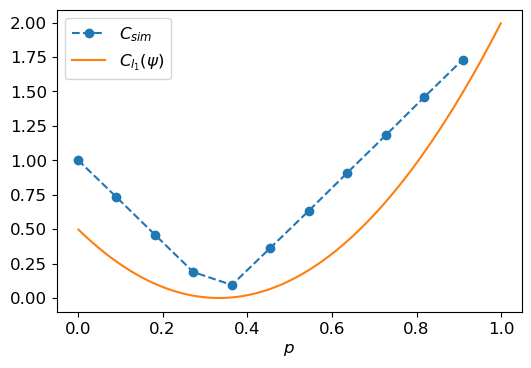

In [249]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(p,  C, 'o--' ,label = r'$C_{sim}$')
plt.plot(y, Coe_psi, label = r'$C_{l_{1}}(\psi)$'); 
plt.legend(); plt.xlabel(r'$p$'); plt.show()

In [125]:
pmax = 1; dp = pmax/11; p = np.arange(0, pmax, dp)
for j in range(0, len(p)):
    qr = qiskit.QuantumRegister(5); qc = qiskit.QuantumCircuit(qr);
    # state preparation
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    desired_vector_HWp1 = [
    math.sqrt((1-p[j])/6),
    (math.sqrt((1-p[j])/6))*(-1j*math.sqrt(3)-1)/2,
    (math.sqrt((1-p[j])/6))*(1j*math.sqrt(3)-1)/2,
    0,
    math.sqrt((1-p[j])/6),
    math.sqrt((1-p[j])/6),
    math.sqrt((1-p[j])/6),
    0,
    math.sqrt(p[j]/3),
    (math.sqrt(p[j]/3))*(1j*math.sqrt(3)-1)/2,
    (math.sqrt(p[j]/3))*(-1j*math.sqrt(3)-1)/2,
    0,
    0,
    0,
    0,
    0]
    qc.initialize(desired_vector_HWp1, [qr[0],qr[1],qr[2],qr[3]])
    qstc = state_tomography_circuits(qc, [qr[0],qr[1],qr[2],qr[3]]); # circuito para TEQ
    #qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
    job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
    qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
    rhoDCBA = qstf.fit(method='lstsq'); #rhoDCBA # extrai o operador densidade
    rhoBA = pTraceL_num(4, 4, rhoDCBA); # extrai o operador densidade REDUZIDO
    #print(rhoBA[0,0])
    #rhoBA_ = qstf.fit(method='lstsq');
    C[j] = coh_l1(rhoBA)
    ######

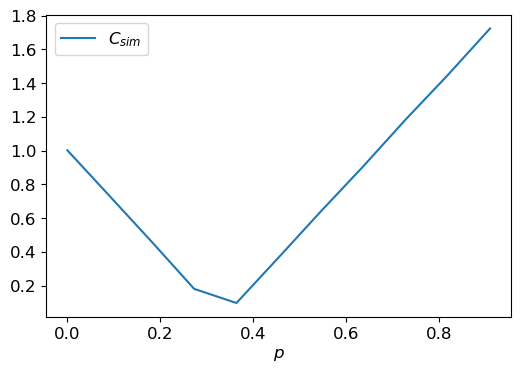

In [126]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(p,  C, label = r'$C_{sim}$')
plt.legend(); plt.xlabel(r'$p$'); plt.show()

In [130]:
pmax = 1; dp = pmax/11; p = np.arange(0, pmax, dp)
for j in range(0, len(p)):
    qr = qiskit.QuantumRegister(5); qc = qiskit.QuantumCircuit(qr);
    # state preparation
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    desired_vector_HWp2 = [
    math.sqrt((1-p[j])/6),
    (math.sqrt((1-p[j])/6))*(-1j*math.sqrt(3)-1)/2,
    (math.sqrt((1-p[j])/6))*(1j*math.sqrt(3)-1)/2,
    0,
    math.sqrt(p[j]/3),
    math.sqrt(p[j]/3),
    math.sqrt(p[j]/3),
    0,
    math.sqrt((1-p[j])/6),
    (math.sqrt((1-p[j])/6))*(1j*math.sqrt(3)-1)/2,
    (math.sqrt((1-p[j])/6))*(-1j*math.sqrt(3)-1)/2,
    0,
    0,
    0,
    0,
    0]
    qc.initialize(desired_vector_HWp2, [qr[0],qr[1],qr[2],qr[3]])
    qstc = state_tomography_circuits(qc, [qr[0],qr[1],qr[2],qr[3]]); # circuito para TEQ
    #qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
    job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
    qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
    rhoDCBA = qstf.fit(method='lstsq'); #rhoDCBA # extrai o operador densidade
    rhoBA = pTraceL_num(4, 4, rhoDCBA); # extrai o operador densidade REDUZIDO
    #print(rhoBA[0,0])
    #rhoBA_ = qstf.fit(method='lstsq');
    C[j] = coh_l1(rhoBA)
    ######

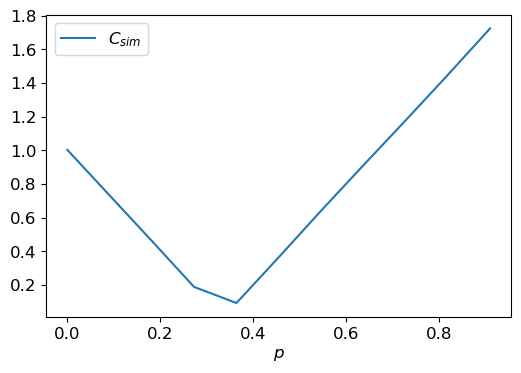

In [131]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(p,  C, label = r'$C_{sim}$')
plt.legend(); plt.xlabel(r'$p$'); plt.show()

In [230]:
gmax = 1; dg = gmax/11; g = np.arange(0, gmax, dg)
C = np.zeros(len(g))
for j in range(0, len(g)):
    qr = qiskit.QuantumRegister(5); qc = qiskit.QuantumCircuit(qr);
    # state preparation
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    desired_vector = [
    math.sqrt(1/3),
    (1-g[j])*math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/2,
    math.sqrt((1-g[j])/3)*(1j*math.sqrt(3)-1)/2,
    0,
    g[j]*math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/2,
    math.sqrt(2*g[j]*(1-g[j])/3)*(-1j*math.sqrt(3)-1)/2,
    0,
    0,
    math.sqrt(g[j]/3)*(1j*math.sqrt(3)-1)/2,
    0,
    0,
    0,
    0,
    0,
    0,
    0]
    qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])
    #qstc = state_tomography_circuits(qc, [qr[0],qr[1],qr[2],qr[3]]); # circuito para TEQ
    qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
    job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
    qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
    rhoBA = qstf.fit(method='lstsq'); #rhoDCBA # extrai o operador densidade
    #rhoBA = pTraceL_num(4, 4, rhoDCBA); # extrai o operador densidade REDUZIDO
    #print(rhoBA[0,0])
    #rhoBA_ = qstf.fit(method='lstsq');
    C[j] = coh_l1(rhoBA)
    ######
    #print(C[j])

    

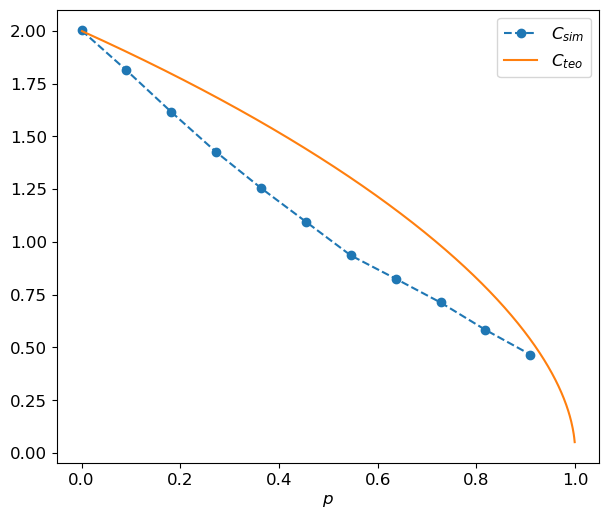

In [233]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (7,6), dpi = 100)
plt.plot(g,  C, 'o--', label = r'$C_{sim}$')
plt.plot(x, Coe_psi_ADC, label = r'$C_{teo}$'); 
plt.legend(); plt.xlabel(r'$p$'); plt.show()

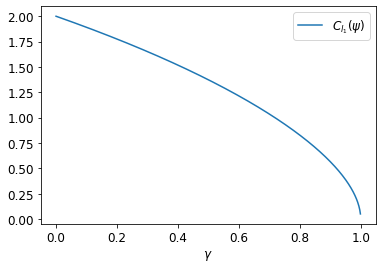

In [232]:
x = np.arange(0.001, 1.0, 0.001); 
Coe_psi_ADC = 2*(np.sqrt(1-x)+x*np.sqrt(2*(1-x))+(1-x)+np.sqrt((1-x)**3))/3 ;
plt.plot(x, Coe_psi_ADC, label = r'$C_{l_{1}}(\psi)$'); 
plt.legend(); plt.xlabel(r'$\gamma$');
plt.show()

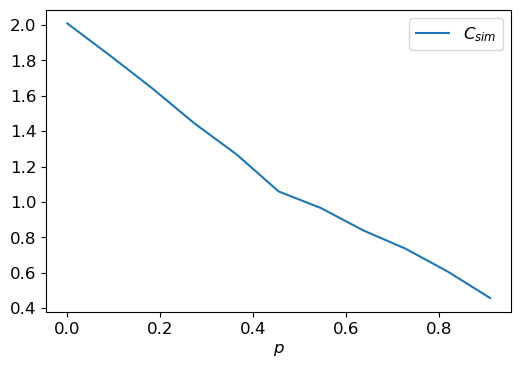

In [139]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(g,  C, label = r'$C_{sim}$')
plt.legend(); plt.xlabel(r'$p$'); plt.show()

In [145]:
gmax = 1; dg = gmax/11; g = np.arange(0, gmax, dg)
for j in range(0, len(g)):
    qr = qiskit.QuantumRegister(5); qc = qiskit.QuantumCircuit(qr);
    # state preparation
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    desired_vector = [
    math.sqrt(1/3),
    (1-g[j])*math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/2,
    math.sqrt((1-g[j])/3)*(1j*math.sqrt(3)-1)/2,
    0,
    g[j]*math.sqrt(1/3)*(-1j*math.sqrt(3)-1)/2,
    math.sqrt(2*g[j]*(1-g[j])/3)*(-1j*math.sqrt(3)-1)/2,
    0,
    0,
    math.sqrt(g[j]/3)*(1j*math.sqrt(3)-1)/2,
    0,
    0,
    0,
    0,
    0,
    0,
    0]
    qc.initialize(desired_vector, [qr[0],qr[1],qr[2],qr[3]])
    #qstc = state_tomography_circuits(qc, [qr[0],qr[1],qr[2],qr[3]]); # circuito para TEQ
    qstc = state_tomography_circuits(qc, [qr[0],qr[1]]); # circuito para TEQ
    #job = qiskit.execute(qstc, Aer.get_backend('qasm_simulator'), shots=nshots) # executa no simulador
    job = qiskit.execute(qstc, backend = device, shots = nshots)
    print(job.job_id()); job_monitor(job)
    qstf = StateTomographyFitter(job.result(), qstc) # ajusta os dados
    rhoBA = qstf.fit(method='lstsq'); #rhoDCBA # extrai o operador densidade
    #rhoBA = pTraceL_num(4, 4, rhoDCBA); # extrai o operador densidade REDUZIDO
    #print(rhoBA[0,0])
    #rhoBA_ = qstf.fit(method='lstsq');
    C[j] = coh_l1(rhoBA)
    ######

6336c1226040899a898e0e8a
Job Status: job has successfully run
6336c4f663d504713486893b
Job Status: job has successfully run
6336c854f15a0b4c2ad05a26
Job Status: job has successfully run
6336cc8dc694241e55669b4a
Job Status: job has successfully run
6336d080f15a0b5e8fd05a52
Job Status: job has successfully run
6336d4851ff5696ee68b6ff3
Job Status: job has successfully run
6336d81e537ba33c3313908d
Job Status: job has successfully run
6336dc4c1ff5690e468b7003
Job Status: job has successfully run
6336def4f15a0b1928d05a8d
Job Status: job has successfully run
6336e228a146b5afe41f6b81
Job Status: job has successfully run
6336e528dee3d6ad28b90c94
Job Status: job has successfully run


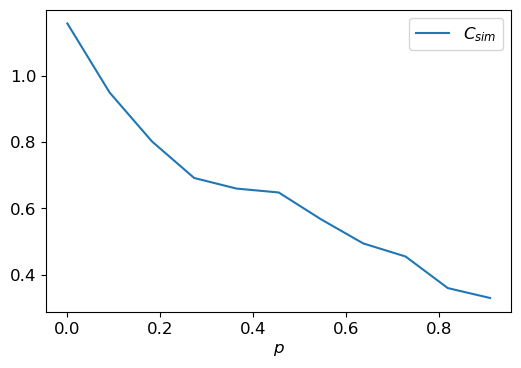

In [146]:
matplotlib.rcParams.update({'font.size':12}); plt.figure(figsize = (6,4), dpi = 100)
plt.plot(g,  C, label = r'$C_{sim}$')
plt.legend(); plt.xlabel(r'$p$'); plt.show()

In [147]:
 print(C[j])

0.3307206802329825
